In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
#Calculating Heating Energy Consumption of a House
Uw = 1.5
Upw = 0
Ur = 0.14
Ud = 3
Uf = 0.63
Ug = 2
ACH = 0.588
Ag = 31.82
Ad = 6.18
AlivingR = 3.99*3.9
fwlength, swlength, w_height = 3.99+0.12+0.95+0.12+3.8, 2.8+0.12+3.9, 5.2
Aw = (fwlength+swlength*2)*w_height - Ag-Ad
Ar = swlength*fwlength
Af =  Ar*2
Apw = fwlength*w_height
V = fwlength*swlength*w_height
Da = 1.2
Cp = 1.01

Avtemp = 21*AlivingR/Af + 18.5*(1-AlivingR/Af)
#CALCULATING HEAT TRANSFER COEFFICIENT
HTC = ((Uw*Aw+Upw*Apw+Ur*Ar+Ud*Ad+Uf*Af+Ug*Ag) + (Da*Cp*V*0.589*0.33))/1000
#LOAD MEASURED DATA
df = pd.read_csv('..\\measured_values.csv',skiprows=1, parse_dates=True, index_col=0)

#SET POINT TEMPERATURE
df['cTdesign'] = Avtemp - df.Tout
#ACTUAL MEASURED TEMPERATURE
df['cTadj'] = df['AllTin'] - df.Tout
#CALCULATIONS OF HEAT ENERGY BASED ON SCHEDULED TEMPERATURE
df['Measured'] = HTC * df['cTdesign']/0.88
df['MeasuredSync'] = HTC * df['cTdesign']/0.88 * df.GasUsed/df.GasUsed
#CALCULATIONS OF HEAT ENERGY BASED ON ACTUAL MEASURED TEMPERATURES
df['MeasuredAdj'] = HTC * df.cTadj/0.88
df['MeasuredSyncAdj'] = HTC * df.cTadj/0.88 * df.GasUsed/df.GasUsed
#MEASURED GAS USE IN KWH - ACCOUNTING FOR BOILER EFFICIENCY
df['Metered'] = df['GasUsed']*0.88

df.fillna(0, inplace=True)

In [4]:
Aw, Af, Ar, HTC, Apw, V, Avtemp

(79.624,
 122.48720000000002,
 61.24360000000001,
 0.3623802961560768,
 46.696000000000005,
 318.46672000000007,
 18.817604615012833)

In [106]:
Avtemp-df.Tout.mean(), df.cTdesign.mean()

(10.6724351705684, 10.672435170568386)

In [107]:
df['Measured'].sum(), df['MeasuredSync'].sum(), df['MeasuredAdj'].sum(), df['MeasuredSyncAdj'].sum()

(3164.3019963958113, 1622.8479526393974, 2591.789512556007, 1396.2221558931449)

In [109]:
HTC*(Avtemp-(df['Tout'].mean()))*720/0.88, df['Tout'].min(), df['Tout'].max(), df['Tout'].mean()

(3164.301996395815, -3.553, 15.472999999999999, 8.145169444444432)

In [7]:
df.head()

,Tout,AllTin,OtherAvT,ROOM1,GasUsed,cTdesign,cTadj,Measured,MeasuredSync,MeasuredAdj,MeasuredSyncAdj,Metered
Date Time,,,,,,,,,,,,
2018-11-01 00:00:00,7.983,14.316636,14.3733,13.750,0.0,10.834605,6.333636,4.461645,0.0,2.608165,0.0,0.0
2018-11-01 01:00:00,8.082,14.229545,14.2871,13.654,0.0,10.735605,6.147545,4.420877,0.0,2.531533,0.0,0.0
2018-11-01 02:00:00,8.182,14.142273,14.2007,13.558,0.0,10.635605,5.960273,4.379697,0.0,2.454415,0.0,0.0
2018-11-01 03:00:00,8.481,14.072636,14.1241,13.558,0.0,10.336605,5.591636,4.256570,0.0,2.302612,0.0,0.0
2018-11-01 04:00:00,8.581,13.994000,14.0473,13.461,0.0,10.236605,5.413000,4.215391,0.0,2.229051,0.0,0.0


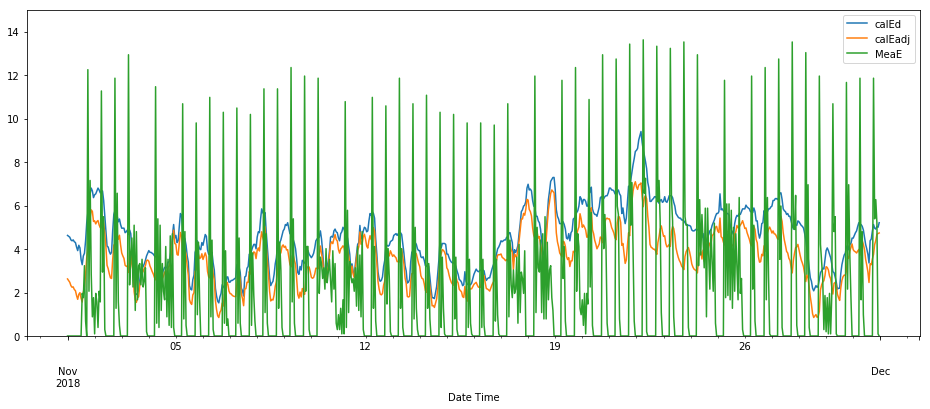

In [407]:
df[['calEd','calEadj','MeaE']].plot(ylim=(0,15), figsize=(16,6))

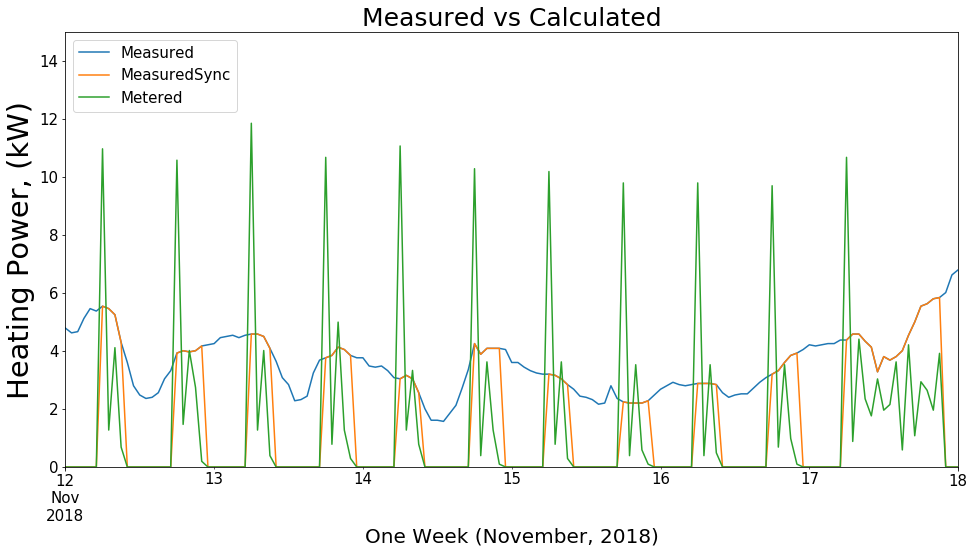

In [498]:
df[['Measured','MeasuredSync','Metered']].plot(xlim=['2018-11-12','2018-11-18'], ylim=(0,15), figsize=(16,8), fontsize=15)
plt.title('Measured vs Calculated', size=25)
plt.ylabel('Heating Power, (kW)', size=29)
plt.xlabel('One Week (November, 2018)', size=20)
plt.legend(loc=2,prop={'size': 15})

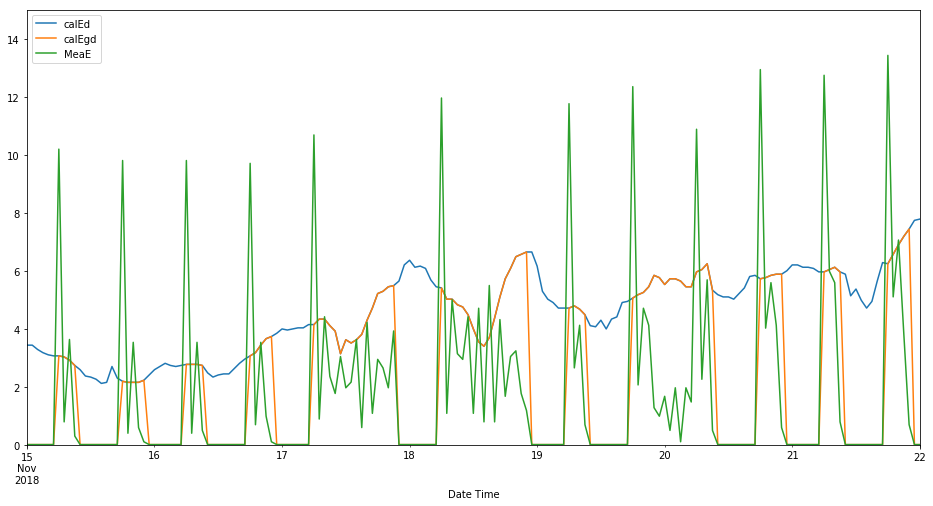

In [219]:
df[['calEd','calEgd','MeaE']].plot(xlim=['2018-11-15','2018-11-22'], ylim=(0,15), figsize=(16,8))

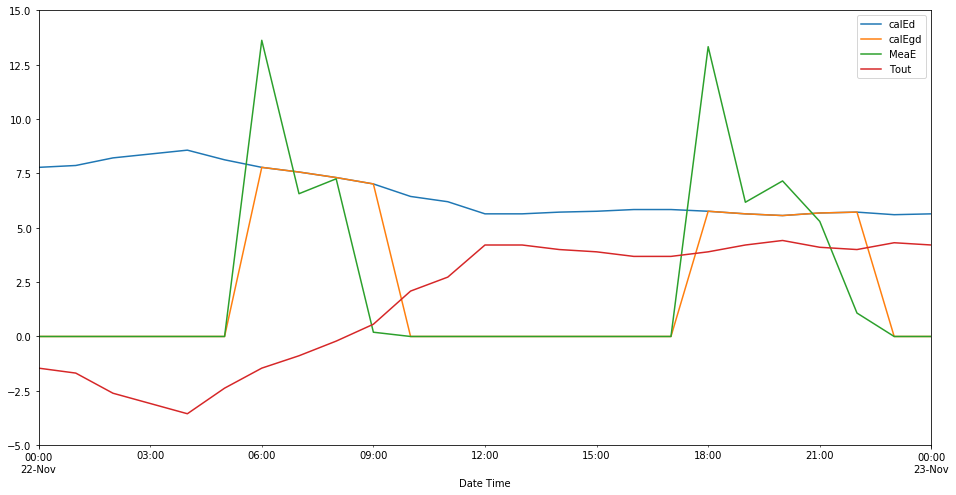

In [228]:
df[['calEd','calEgd','MeaE','Tout']].plot(xlim=['2018-11-22','2018-11-23'], ylim=(-5,15), figsize=(16,8))

In [216]:
df['MeaE'].idxmax(), df['calEd'].idxmax(), df['calEadj'].idxmax()

(Timestamp('2018-11-22 06:00:00'),
 Timestamp('2018-11-22 04:00:00'),
 Timestamp('2018-11-21 23:00:00'))

In [217]:
df[['calEd','calEgd','calEadj','calEgadj','MeaE']].idxmax()

calEd      2018-11-22 04:00:00
calEgd     2018-11-22 06:00:00
calEadj    2018-11-21 23:00:00
calEgadj   2018-11-21 22:00:00
MeaE       2018-11-22 06:00:00
dtype: datetime64[ns]

In [214]:
df[['cT19.15','cTadj']].idxmax()

cT19.15   2018-11-22 04:00:00
cTadj     2018-11-21 23:00:00
dtype: datetime64[ns]

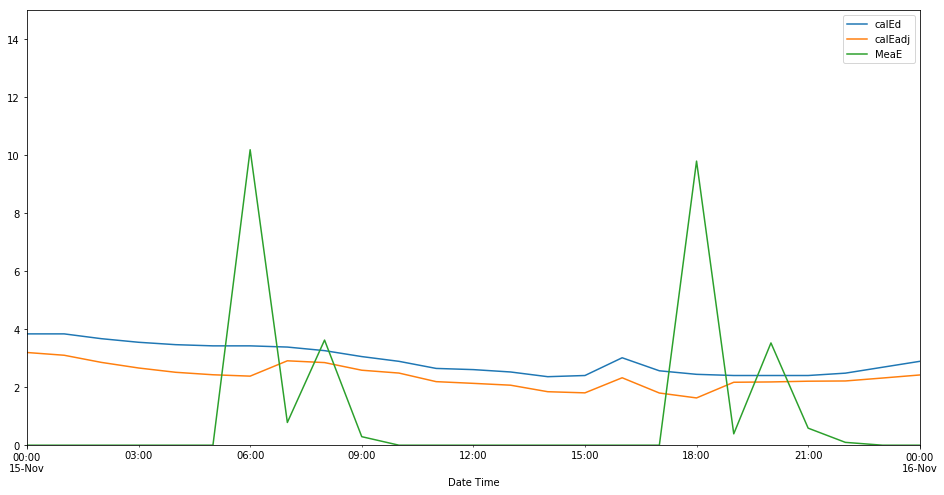

In [327]:
df[['calEd','calEadj','MeaE']].plot(xlim=['2018-11-15','2018-11-16'], ylim=(0,15), figsize=(16,8))

Text(0.5,0,'November, 2018')

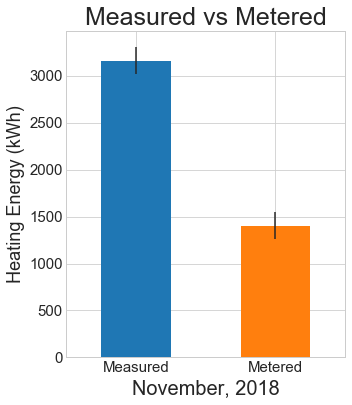

In [89]:
df[['Measured','Metered']].sum().plot.bar(figsize=(5,6), rot=0, yerr=0.205*24*30 ,fontsize=15) #The whole month
plt.title('Measured vs Metered', size=25)
plt.ylabel('Heating Energy (kWh)', size=18)
plt.xlabel('November, 2018', size=20)
#plt.legend(loc=2,prop={'size': 15})

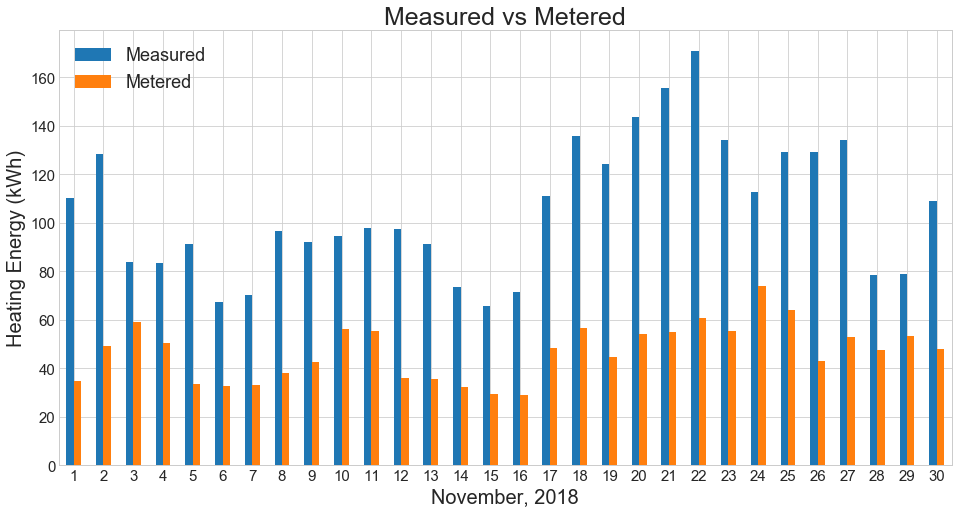

In [722]:
df[['Measured','Metered']].groupby(df.index.day).sum().plot.bar(figsize=(16,8), rot=0, fontsize=15)
plt.title('Measured vs Metered', size=25)
plt.ylabel('Heating Energy (kWh)', size=20)
plt.xlabel('November, 2018', size=20)
plt.legend(loc=2,prop={'size': 18})

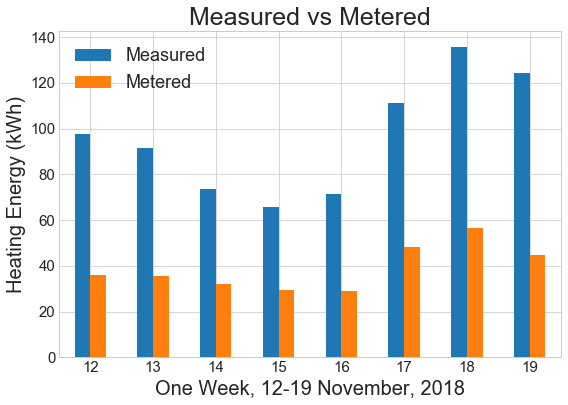

In [550]:
df['2018-11-12':'2018-11-19'][['Measured','Metered']].groupby(df['2018-11-12':'2018-11-19'].index.day).sum().plot.bar(figsize=(9,6), rot=0, fontsize=15)
plt.title('Measured vs Metered', size=25)
plt.ylabel('Heating Energy (kWh)', size=20)
plt.xlabel('One Week, 12-19 November, 2018', size=20)
plt.legend(loc=2,prop={'size': 18})
#One week - energy

In [140]:
1-df[['Measured','Metered']].sum()[1]/df[['Measured','Metered']].sum()[0]

0.5559829315689839

In [141]:
1-df['2018-11-15'][['Measured','Metered']].sum()[1]/df['2018-11-15'][['Measured','Metered']].sum()[0]

0.5539975279324247

In [142]:
1-df['2018-11-12':'2018-11-19'][['Measured','Metered']].sum()[1]/df['2018-11-12':'2018-11-19'][['Measured','Metered']].sum()[0]

0.5958667016722679

In [139]:
df['2018-11-15'][['Measured','Metered']].sum()

Measured    65.693581
Metered     29.299500
dtype: float64

In [156]:
0.23299/(df['2018-11-12':'2018-11-19'][['Measured','Metered']].sum()[0]/(8*24))

0.05799765871270351

Text(0.5,0,'One Week, 12-19 November, 2018')

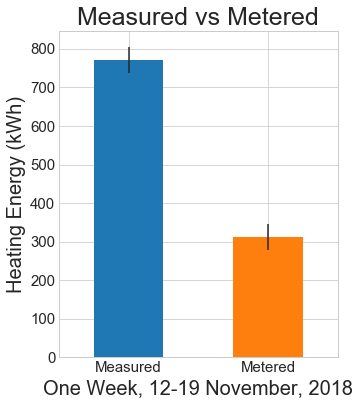

In [86]:
df['2018-11-12':'2018-11-19'][['Measured','Metered']].sum().plot.bar(figsize=(5,6), yerr=0.205*7*24, rot=0, fontsize=15)
plt.title('Measured vs Metered', size=25)
plt.ylabel('Heating Energy (kWh)', size=20)
plt.xlabel('One Week, 12-19 November, 2018', size=20)
#plt.legend(loc=2,prop={'size': 18})
#One week - energy

Text(0.5,0,'One Day, 15 November, 2018')

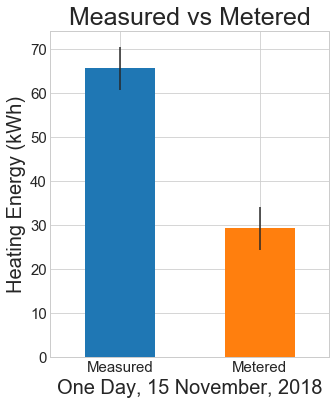

In [88]:
df['2018-11-15'][['Measured','Metered']].sum().plot.bar(figsize=(5,6), rot=0, yerr=0.205*24, fontsize=15)
plt.title('Measured vs Metered', size=25)
plt.ylabel('Heating Energy (kWh)', size=20)
plt.xlabel('One Day, 15 November, 2018', size=20)
#plt.legend(loc=1,prop={'size': 18})
#One Day - energy

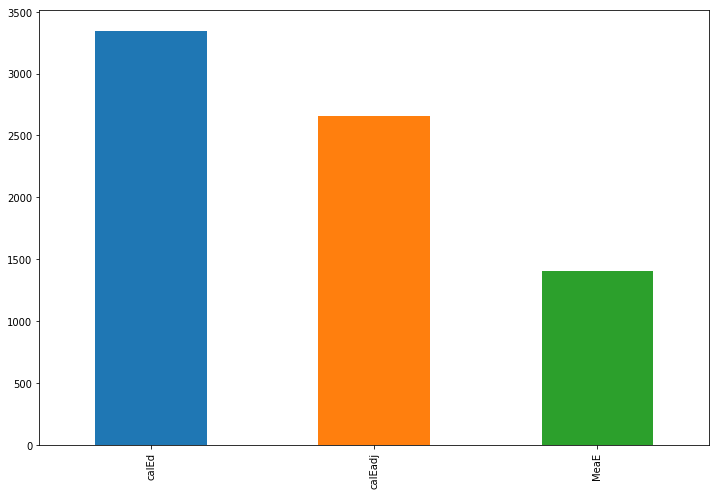

In [326]:
df[['calEd','calEadj','MeaE']].sum().plot.bar(figsize=(12,8)) #The whole month

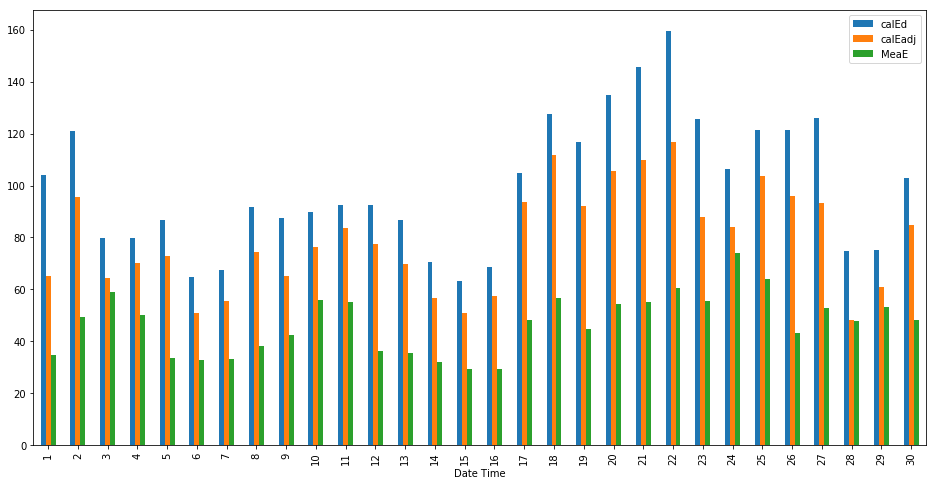

In [171]:
df[['calEd','calEadj','MeaE']].groupby(df.index.day).sum().plot.bar(figsize=(16,8))

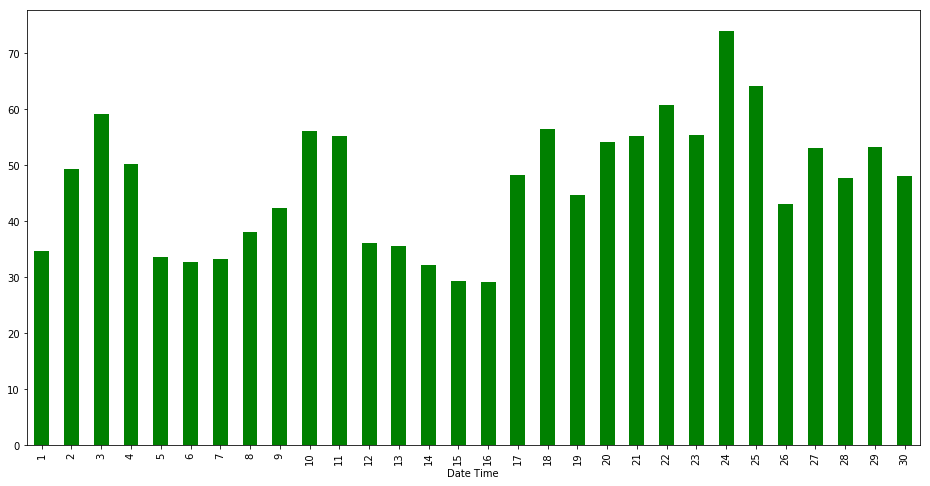

In [175]:
df['MeaE'].groupby(df.index.day).sum().plot.bar(figsize=(16,8), color='green')

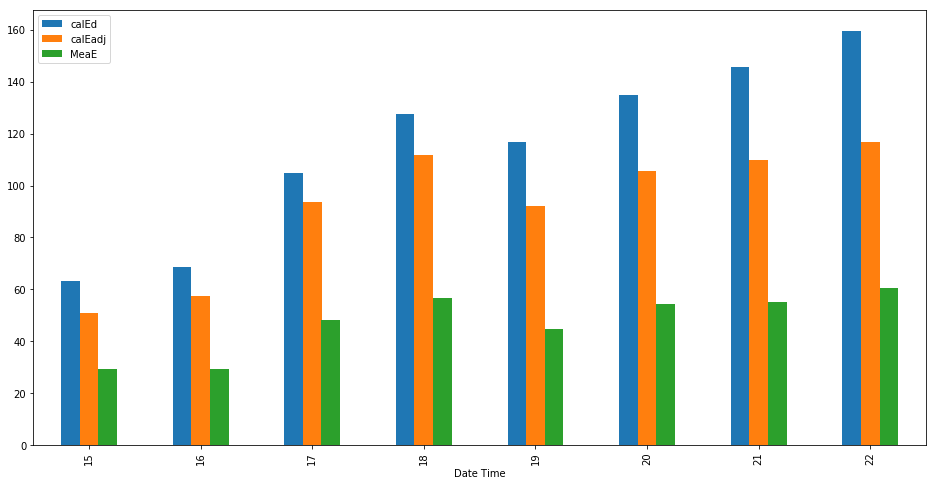

In [250]:
df['2018-11-15':'2018-11-22'][['calEd','calEadj','MeaE']].groupby(df['2018-11-15':'2018-11-22'].index.day).sum().plot.bar(figsize=(16,8))
#One week - energy

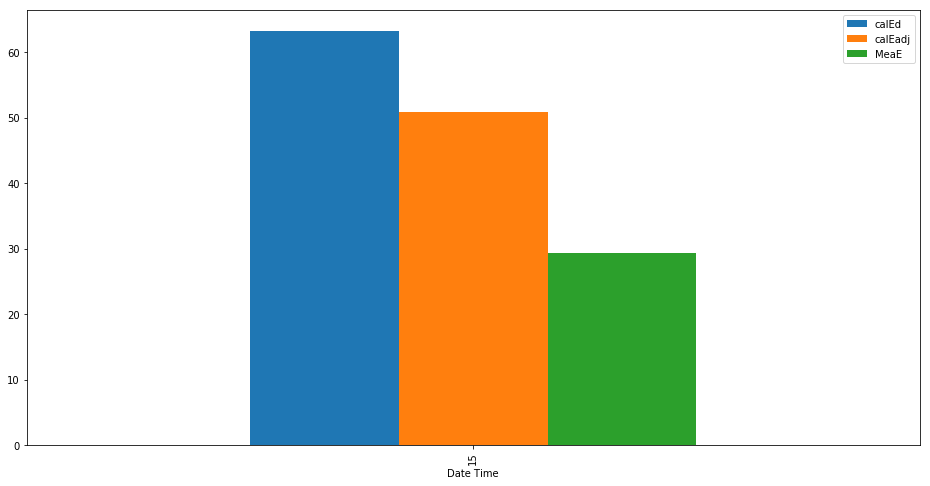

In [177]:
df['2018-11-15'][['calEd','calEadj','MeaE']].groupby(df['2018-11-15'].index.day).sum().plot.bar(figsize=(16,8))
#One day energy used

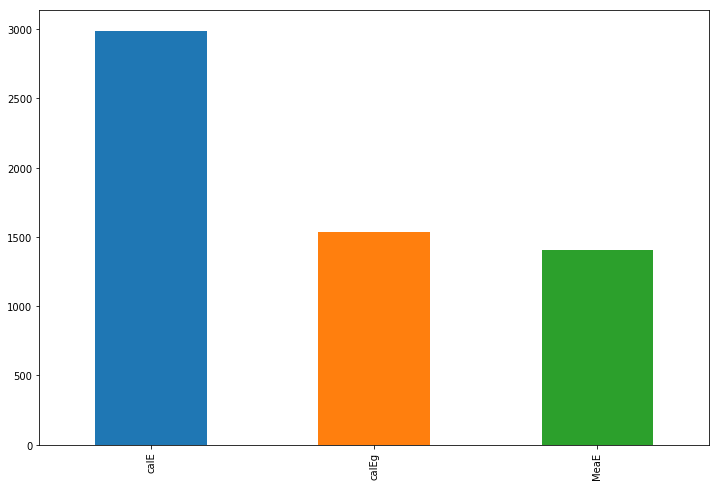

In [54]:
df[['calEd','calEgd','MeaE']].sum().plot.bar(figsize=(12,8))

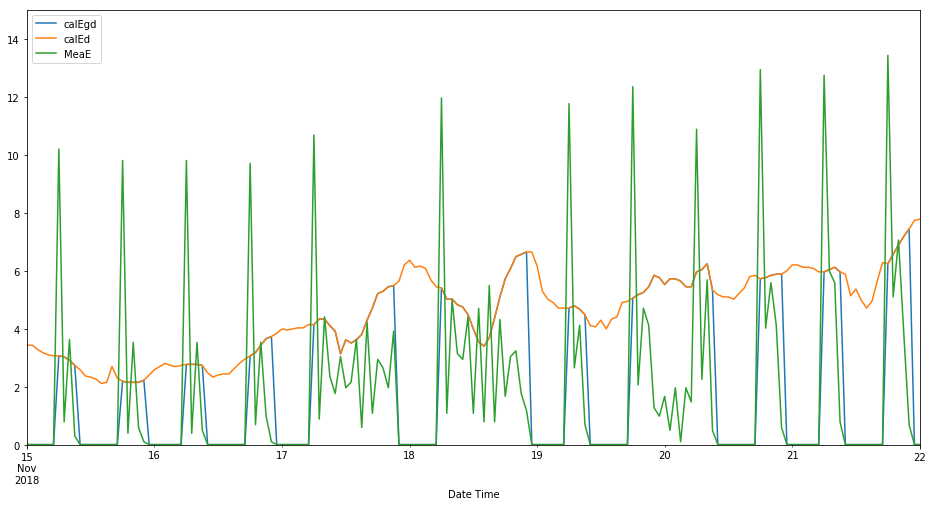

In [180]:
df[['calEgd','calEd','MeaE']].plot(xlim=['2018-11-15','2018-11-22'], ylim=(0,15), figsize=(16,8))

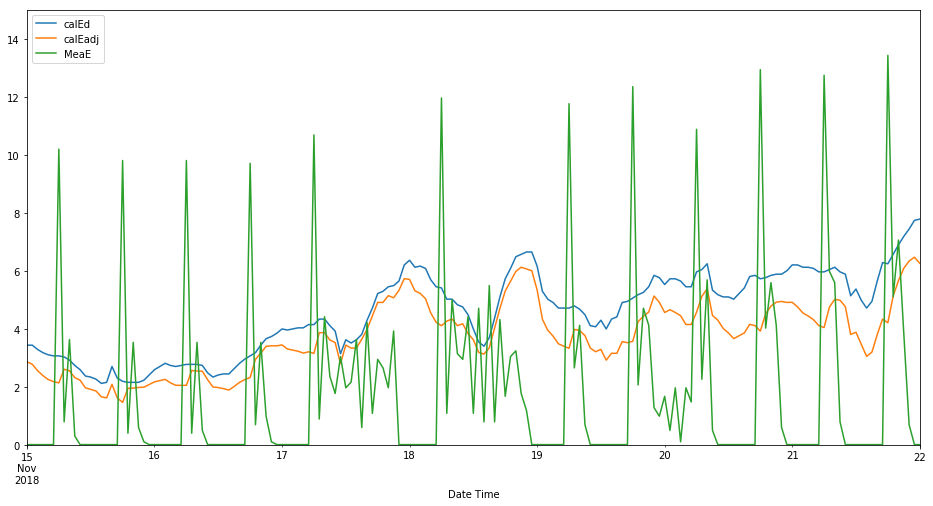

In [164]:
df[['calEd','calEadj','MeaE']].plot(xlim=['2018-11-15','2018-11-22'], ylim=(0,15), figsize=(16,8))

In [ ]:
df[['calEg','calE','MeaE']].plot(xlim=['2018-11-15','2018-11-22'], ylim=(0,15), figsize=(16,8))

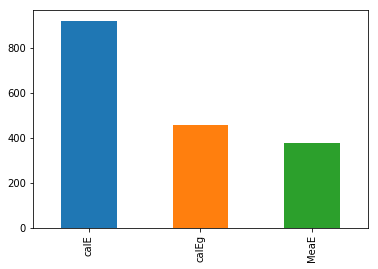

In [91]:
df['2018-11-15':'2018-11-22'][['calE','calEg','MeaE']].sum().plot.bar()

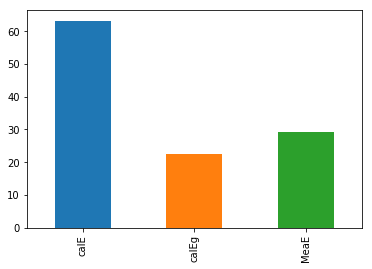

In [78]:
df[['calE','calEg','MeaE']]['2018-11-15'].sum().plot.bar()

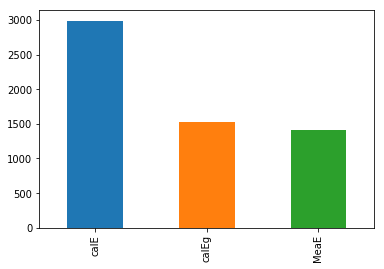

In [79]:
df[['calE','calEg','MeaE']].sum().plot.bar()

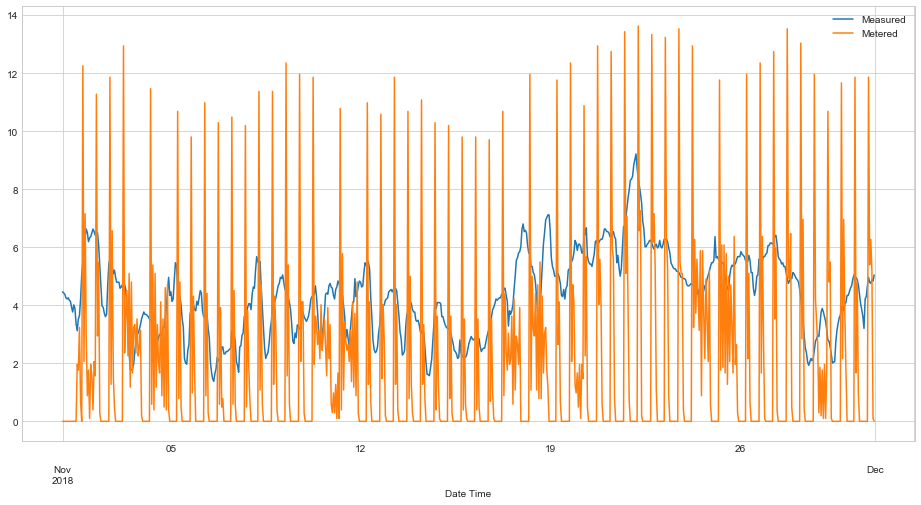

In [596]:
df[['Measured','Metered']].plot(figsize=(16,8))

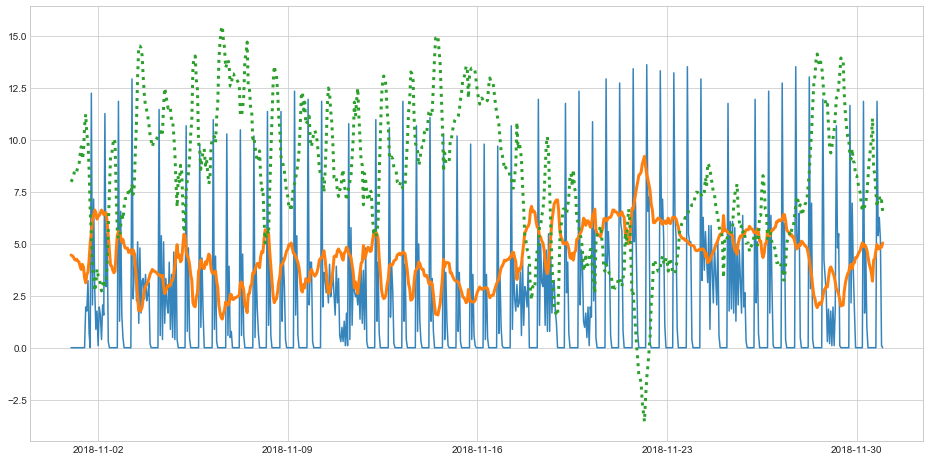

In [650]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df.Metered, alpha=0.9, ls='-')
plt.plot(df.index, df.Measured, lw=3)
plt.plot(df.index, df.Tout, lw=3,ls=':' )

In [196]:
df.head()

,Tout,AllTin,OtherAvT,ROOM1,GasUsed,cTdesign,cTadj,Measured,MeasuredSync,MeasuredAdj,MeasuredSyncAdj,Metered
Date Time,,,,,,,,,,,,
2018-11-01 00:00:00,7.983,14.316636,14.3733,13.750,0.0,10.834605,6.333636,4.461645,0.0,2.608165,0.0,0.0
2018-11-01 01:00:00,8.082,14.229545,14.2871,13.654,0.0,10.735605,6.147545,4.420877,0.0,2.531533,0.0,0.0
2018-11-01 02:00:00,8.182,14.142273,14.2007,13.558,0.0,10.635605,5.960273,4.379697,0.0,2.454415,0.0,0.0
2018-11-01 03:00:00,8.481,14.072636,14.1241,13.558,0.0,10.336605,5.591636,4.256570,0.0,2.302612,0.0,0.0
2018-11-01 04:00:00,8.581,13.994000,14.0473,13.461,0.0,10.236605,5.413000,4.215391,0.0,2.229051,0.0,0.0


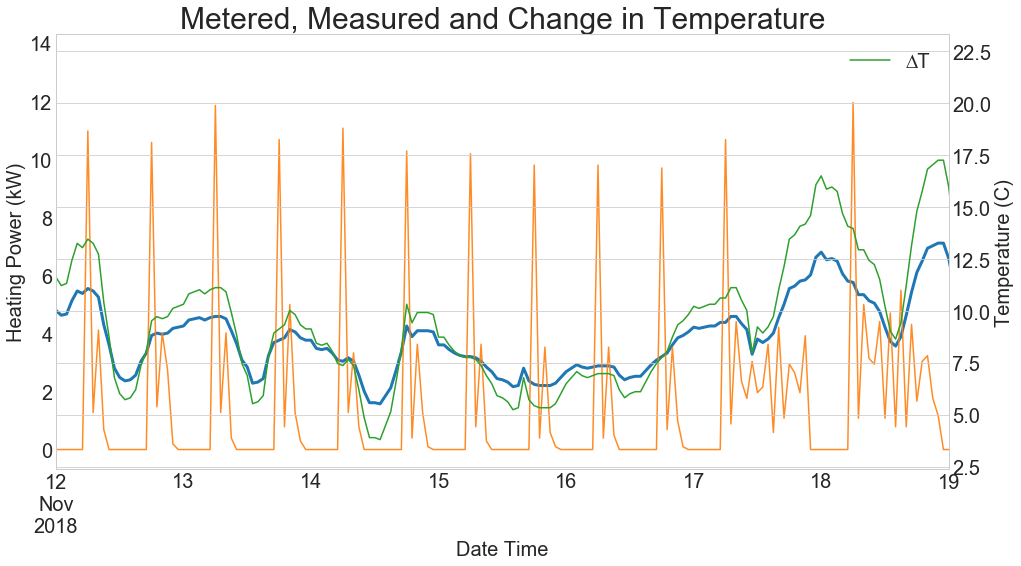

In [204]:
plt.figure(figsize=(16,8))
plt.title('Metered, Measured and Change in Temperature', size=30)
plt.ylabel('Heating Power (kW)', size=20)
df['Measured'].plot(lw=3, label='Measured')
df['Metered'].plot(alpha=0.9, fontsize=20, xlim=['2018-11-12','2018-11-19'])
plt.xlabel(s='November',size=20)
#plt.legend(loc=2,prop={'size': 18})
#df['Tout'].plot(secondary_y=True, label='Tout', fontsize=15)
df['cTdesign'].plot(secondary_y=True, label='∆T', fontsize=20)
plt.ylabel('Temperature (C)', size=20)
plt.legend(loc=1,prop={'size': 20})

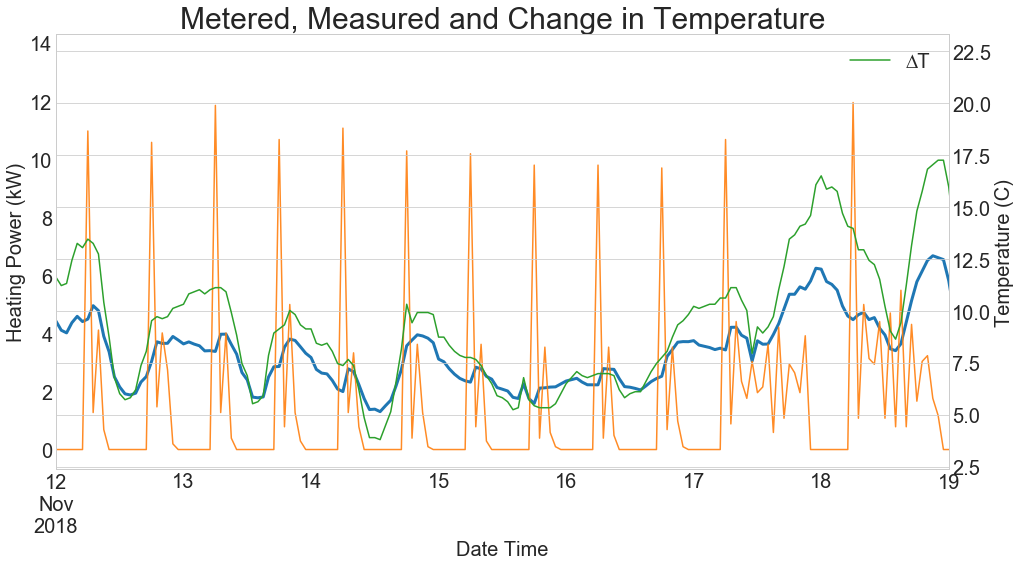

In [232]:
plt.figure(figsize=(16,8))
plt.title('Metered, Measured and Change in Temperature', size=30)
plt.ylabel('Heating Power (kW)', size=20)
df['MeasuredAdj'].plot(lw=3, label='Measured')
df['Metered'].plot(alpha=0.9, fontsize=20, xlim=['2018-11-12','2018-11-19'])
plt.xlabel(s='November',size=20)
#plt.legend(loc=2,prop={'size': 18})
#df['Tout'].plot(secondary_y=True, label='Tout', fontsize=15)
df['cTdesign'].plot(secondary_y=True, label='∆T', fontsize=20)
plt.ylabel('Temperature (C)', size=20)
plt.legend(loc=1,prop={'size': 20})

In [568]:
df.Metered.idxmax(),  df.Metered.max()

(Timestamp('2018-11-22 06:00:00'), 13.6208375864)

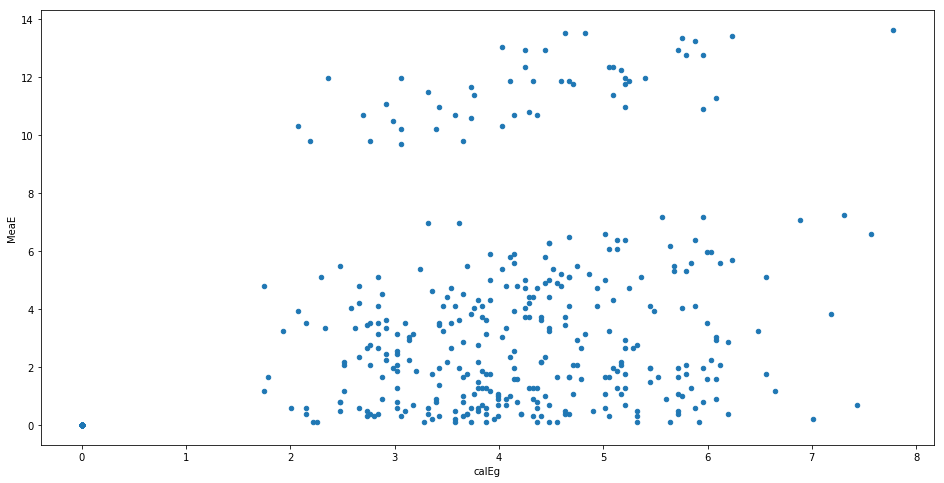

In [53]:
df.plot.scatter(x='calEg',y='MeaE', figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

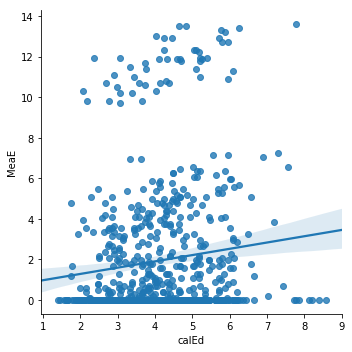

In [224]:
plt.figure(figsize=(16,8))
sns.lmplot(x='calEd',y='MeaE', data=df)

In [ ]:
(df.groupby([df['Date'].dt.hour, 'weekday'])['Cyclists'].sum().unstack())

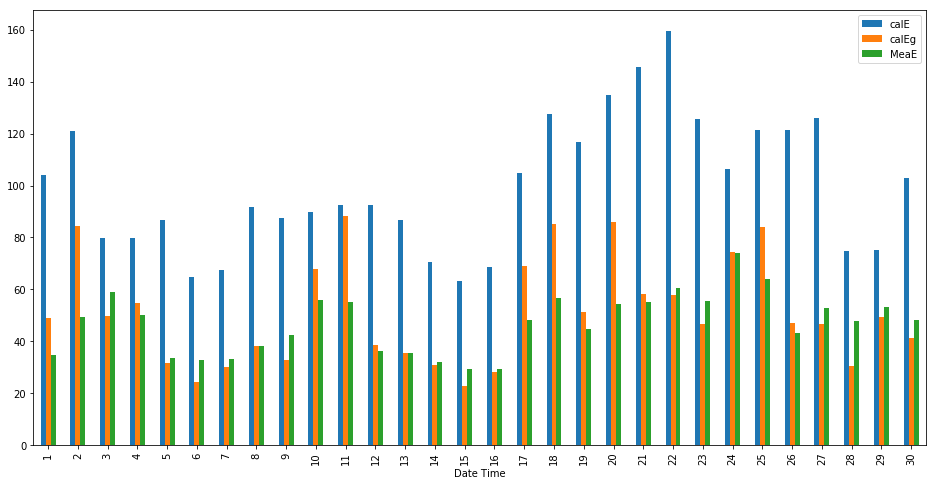

In [133]:
df.groupby(df.index.day)[['calE','calEg','MeaE']].sum().plot.bar(figsize=(16,8))

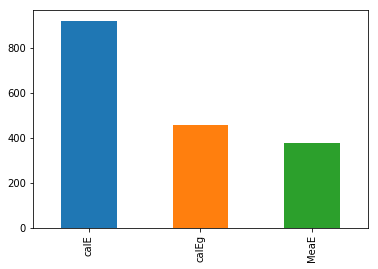

In [135]:
df['2018-11-15':'2018-11-22'][['calE','calEg','MeaE']].sum().plot.bar()

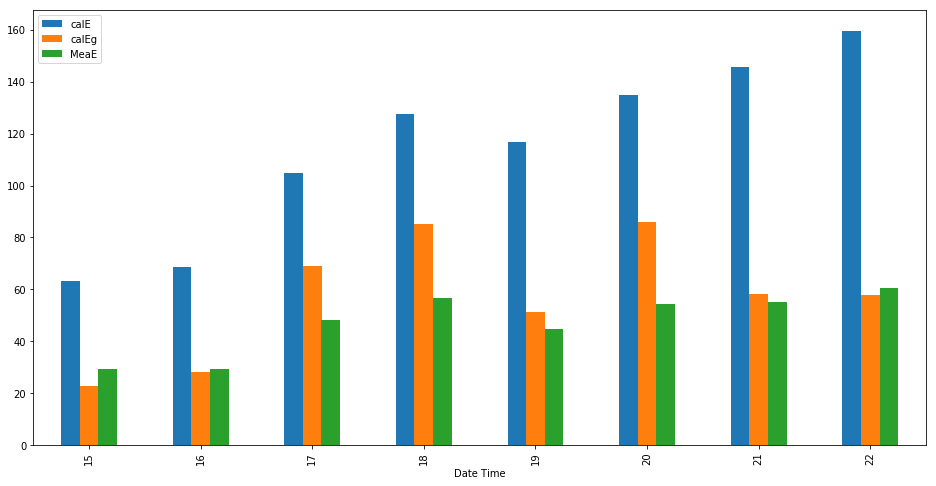

In [146]:
df['2018-11-15':'2018-11-22'][['calE','calEg','MeaE']].groupby(df['2018-11-15':'2018-11-22'].index.day).sum().plot.bar(figsize=(16,8))

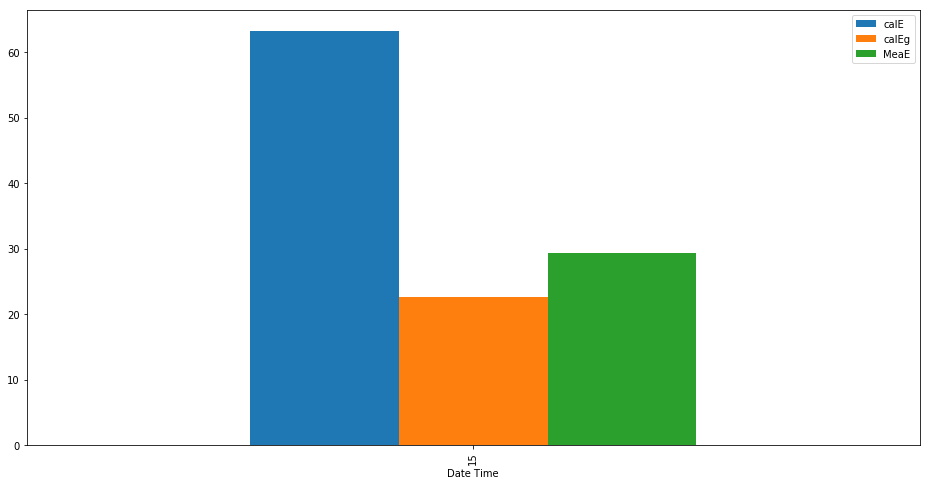

In [147]:
df['2018-11-15'][['calE','calEg','MeaE']].groupby(df['2018-11-15'].index.day).sum().plot.bar(figsize=(16,8))

In [223]:
df.index

DatetimeIndex(['2018-11-01 00:00:00', '2018-11-01 01:00:00',
               '2018-11-01 02:00:00', '2018-11-01 03:00:00',
               '2018-11-01 04:00:00', '2018-11-01 05:00:00',
               '2018-11-01 06:00:00', '2018-11-01 07:00:00',
               '2018-11-01 08:00:00', '2018-11-01 09:00:00',
               ...
               '2018-11-30 14:00:00', '2018-11-30 15:00:00',
               '2018-11-30 16:00:00', '2018-11-30 17:00:00',
               '2018-11-30 18:00:00', '2018-11-30 19:00:00',
               '2018-11-30 20:00:00', '2018-11-30 21:00:00',
               '2018-11-30 22:00:00', '2018-11-30 23:00:00'],
              dtype='datetime64[ns]', name='Date Time', length=720, freq=None)

In [222]:
df.head()

,Tout,AllTin,OtherAvT,ROOM1,GasUsed,cT19.15,cTadj,calEd,calEgd,calEadj,calEgadj,MeaE
Date Time,,,,,,,,,,,,
2018-11-01 00:00:00,7.983,14.316636,14.3733,13.750,0.0,11.167,6.333636,4.214969,0.0,2.390623,0.0,0.0
2018-11-01 01:00:00,8.082,14.229545,14.2871,13.654,0.0,11.068,6.147545,4.177602,0.0,2.320383,0.0,0.0
2018-11-01 02:00:00,8.182,14.142273,14.2007,13.558,0.0,10.968,5.960273,4.139857,0.0,2.249697,0.0,0.0
2018-11-01 03:00:00,8.481,14.072636,14.1241,13.558,0.0,10.669,5.591636,4.027000,0.0,2.110556,0.0,0.0
2018-11-01 04:00:00,8.581,13.994000,14.0473,13.461,0.0,10.569,5.413000,3.989255,0.0,2.043130,0.0,0.0


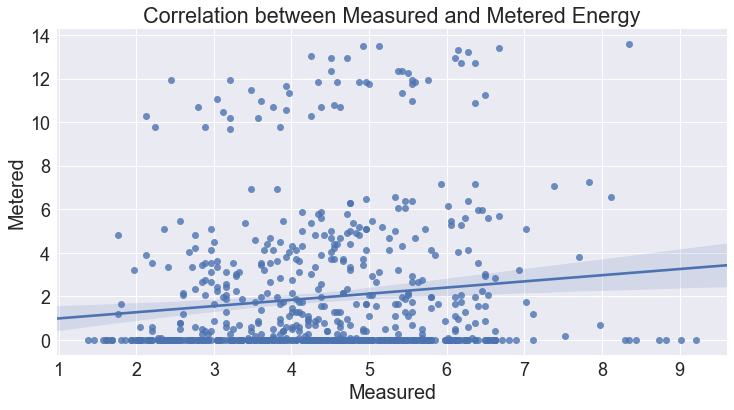

In [838]:
plt.figure(figsize=(12,6))
plt.title('Correlation between Measured and Metered Energy')
sns.regplot(x='Measured', y='Metered', data=df)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x432 with 0 Axes>

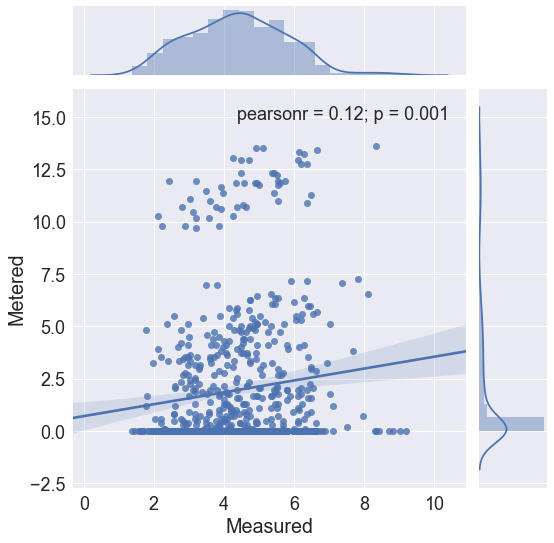

In [832]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Measured', y='Metered', data=df, kind='reg', size=8)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,43,'Change in temperature')

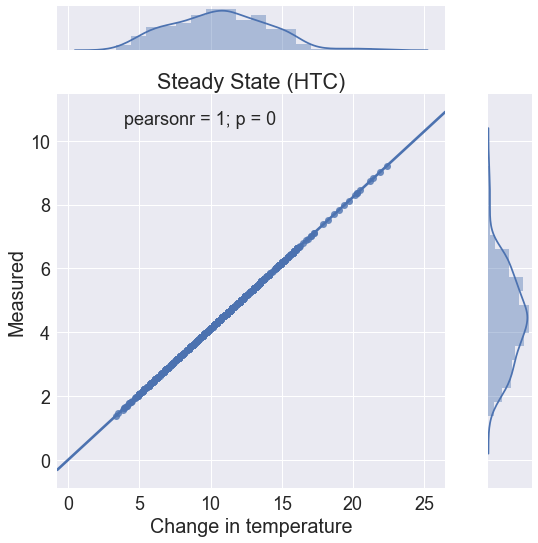

In [846]:
sns.jointplot(x='cTdesign', y='Measured', data=df, kind='reg', size=8, space=1)
plt.title('Steady State (HTC)')
plt.xlabel('Change in temperature')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,55.5,'Change in temperature')

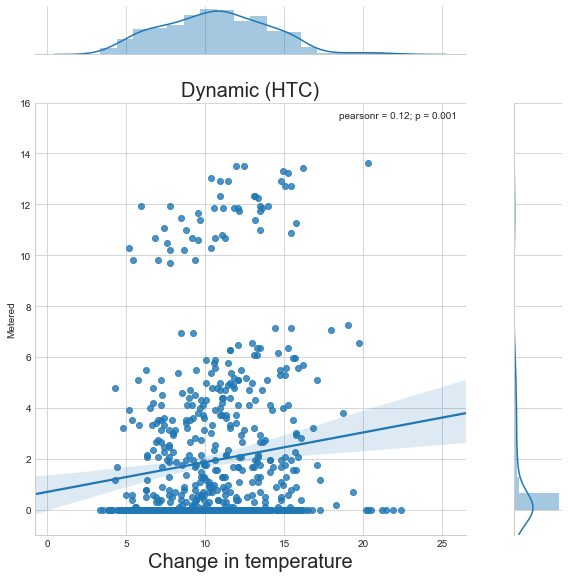

In [14]:
sns.jointplot(x='cTdesign', y='Metered', data=df, kind='reg', size=8, ylim=(-1,16), space=1)
plt.title('Dynamic (HTC)', size=20)
plt.xlabel('Change in temperature', size=20)

In [741]:
df.head()

,Tout,AllTin,OtherAvT,ROOM1,GasUsed,cTdesign,cTadj,Measured,MeasuredSync,MeasuredAdj,MeasuredSyncAdj,Metered
Date Time,,,,,,,,,,,,
2018-11-01 00:00:00,7.983,14.316636,14.3733,13.750,0.0,10.834605,6.333636,4.461645,0.0,2.608165,0.0,0.0
2018-11-01 01:00:00,8.082,14.229545,14.2871,13.654,0.0,10.735605,6.147545,4.420877,0.0,2.531533,0.0,0.0
2018-11-01 02:00:00,8.182,14.142273,14.2007,13.558,0.0,10.635605,5.960273,4.379697,0.0,2.454415,0.0,0.0
2018-11-01 03:00:00,8.481,14.072636,14.1241,13.558,0.0,10.336605,5.591636,4.256570,0.0,2.302612,0.0,0.0
2018-11-01 04:00:00,8.581,13.994000,14.0473,13.461,0.0,10.236605,5.413000,4.215391,0.0,2.229051,0.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


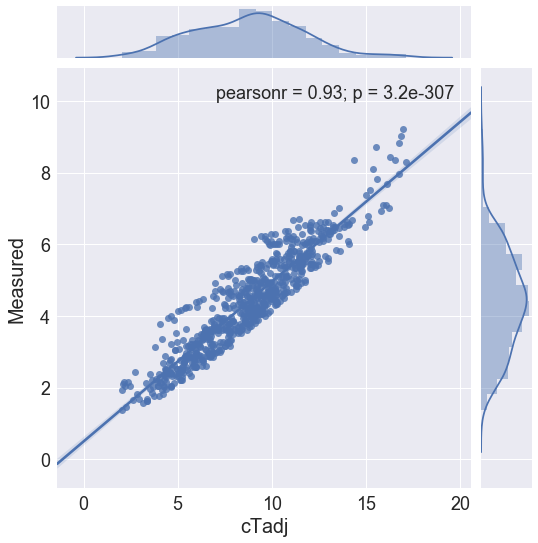

In [818]:
sns.set(font_scale=1.8)
sns.jointplot(x='cTadj', y='Measured', data=df, kind='reg', size=8, ratio=7)


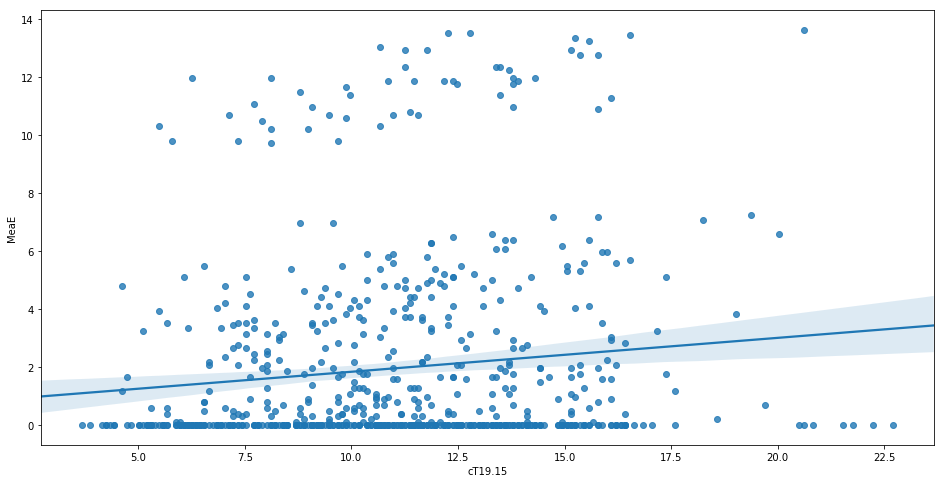

In [229]:
plt.figure(figsize=(16,8))
sns.regplot(x='cT19.15', y='MeaE', data=df)

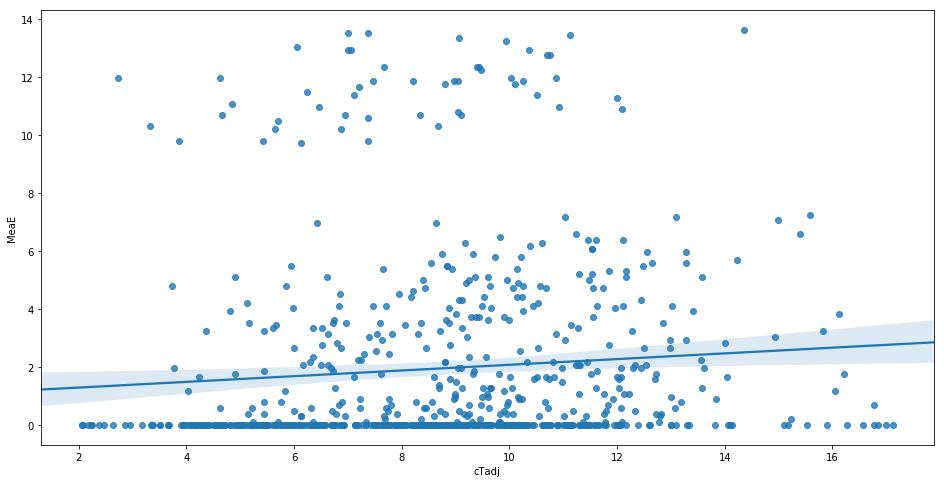

In [230]:
plt.figure(figsize=(16,8))
sns.regplot(x='cTadj', y='MeaE', data=df)

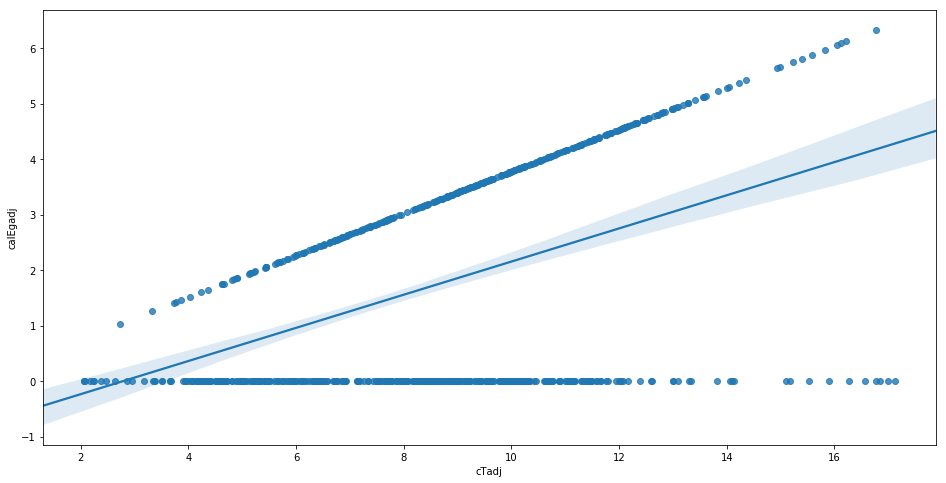

In [238]:
plt.figure(figsize=(16,8))
sns.regplot(x='cTadj', y='calEgadj', data=df)

In [57]:
dfweek = df['2018-11-15':'2018-11-22'][['Measured','Metered']].groupby(df['2018-11-15':'2018-11-22'].index.day).sum()

8

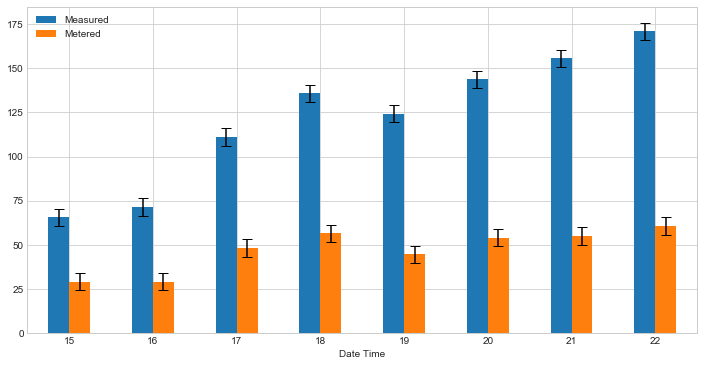

In [85]:
dfweek.plot.bar(figsize=(12,6), yerr=0.205*24, ecolor='black', capsize=5, rot=0)

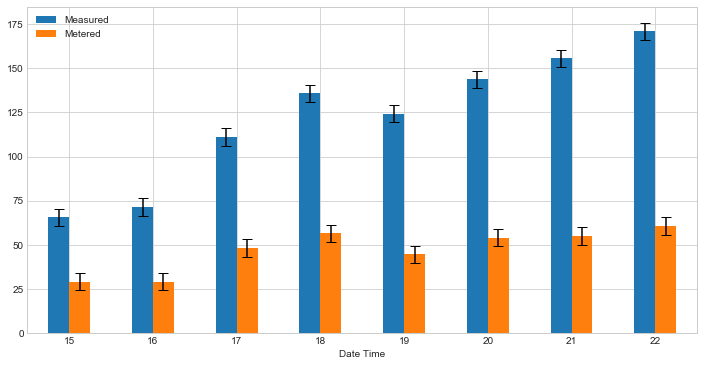

In [59]:
dfweek.plot.bar(figsize=(12,6), yerr=4.92, ecolor='black', capsize=5, rot=0)

In [258]:
dfweek.head()

,calEd,calEadj,MeaE
Date Time,,,
15,63.225297,50.805039,29.299500
16,68.605828,57.527846,29.201508
17,104.872230,93.552200,48.211886
18,127.524057,111.859114,56.541175
19,116.961533,92.143871,44.684187


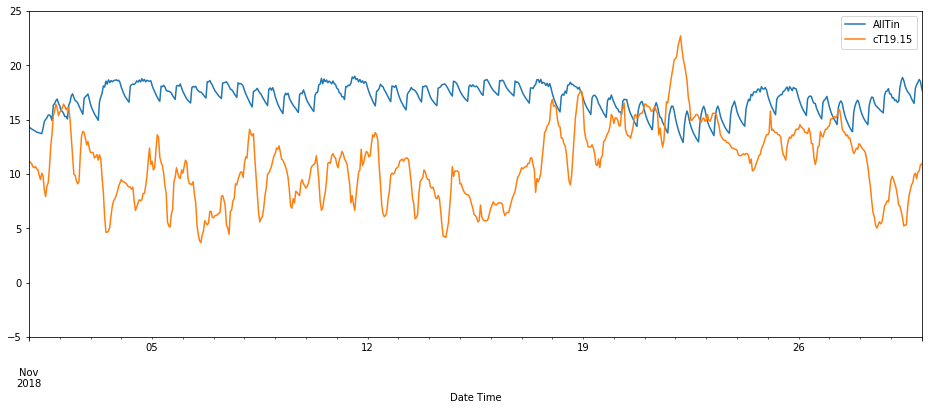

In [422]:
df.iloc[:,[1,5]].plot(xlim=['2018-11-01','2018-11-30'], ylim=(-5,25),figsize=(16,6))

In [427]:
df.head()

,Tout,AllTin,OtherAvT,ROOM1,GasUsed,cT19.15,cTadj,calEd,calEgd,calEadj,calEgadj,MeaE
Date Time,,,,,,,,,,,,
2018-11-01 00:00:00,7.983,14.316636,14.3733,13.750,0.0,11.167,6.333636,4.598524,0.0,2.608165,0.0,0.0
2018-11-01 01:00:00,8.082,14.229545,14.2871,13.654,0.0,11.068,6.147545,4.557756,0.0,2.531533,0.0,0.0
2018-11-01 02:00:00,8.182,14.142273,14.2007,13.558,0.0,10.968,5.960273,4.516576,0.0,2.454415,0.0,0.0
2018-11-01 03:00:00,8.481,14.072636,14.1241,13.558,0.0,10.669,5.591636,4.393449,0.0,2.302612,0.0,0.0
2018-11-01 04:00:00,8.581,13.994000,14.0473,13.461,0.0,10.569,5.413000,4.352270,0.0,2.229051,0.0,0.0


In [430]:
len(df[df['GasUsed']!=0]),len(df[df['calEgd']!=0])

(360, 360)

In [457]:
HTC*(Avtemp-(df['Tout'].mean()))*282/0.88, 7*22+16*2*4

(1239.3516152550276, 282)

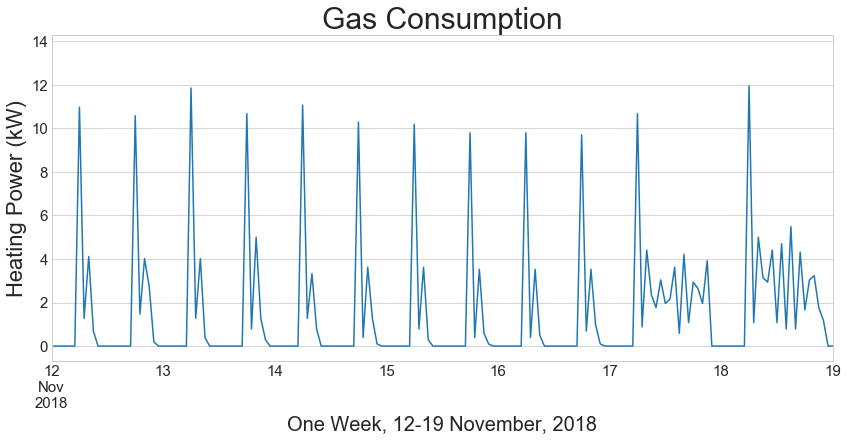

In [126]:
df['Metered'].plot(xlim=['2018-11-12','2018-11-19'], figsize=(14,6), fontsize=15)
plt.title('Gas Consumption', size=30)
plt.ylabel('Heating Power (kW)', size=22)
plt.xlabel('One Week, 12-19 November, 2018', size=20)
plt.savefig('C:/Users/Daray/Google Drive/New Collection/cvaa12/CVP316/report in latex/figs/gasweek.pdf', dpi=200)

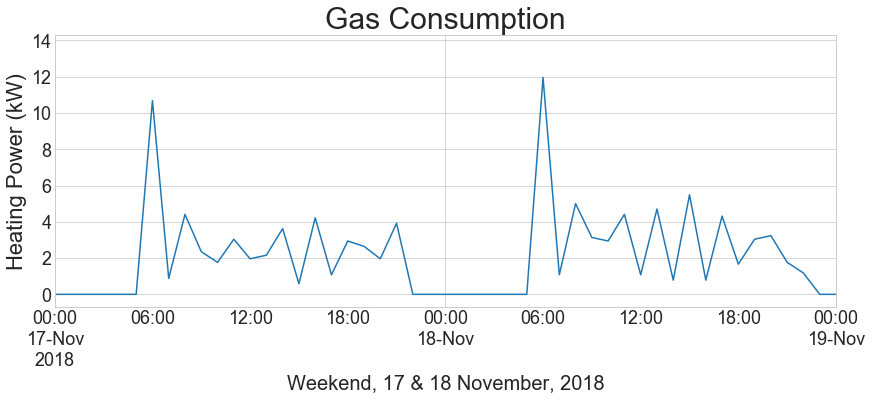

In [124]:
df['Metered'].plot(xlim=['2018-11-17','2018-11-19'], figsize=(14,5), fontsize=18)
plt.title('Gas Consumption', size=30)
plt.ylabel('Heating Power (kW)', size=22)
plt.xlabel('Weekend, 17 & 18 November, 2018', size=20)
plt.savefig('C:/Users/Daray/Google Drive/New Collection/cvaa12/CVP316/report in latex/figs/gasweekend.pdf', dpi=200)

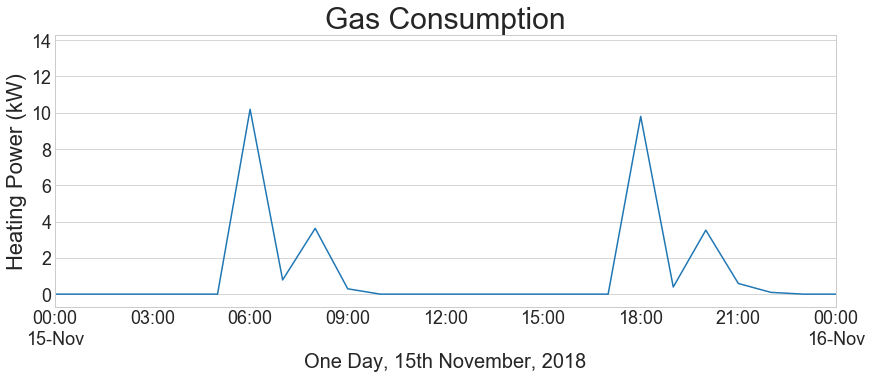

In [127]:
df['Metered'].plot(xlim=['2018-11-15','2018-11-16'], figsize=(14,5), fontsize=18)
plt.title('Gas Consumption', size=30)
plt.ylabel('Heating Power (kW)', size=22)
plt.xlabel('One Day, 15th November, 2018', size=20)
plt.savefig('C:/Users/Daray/Google Drive/New Collection/cvaa12/CVP316/report in latex/figs/gasday.pdf', dpi=200)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3358: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


Text(0,80,'This point is interesting!')

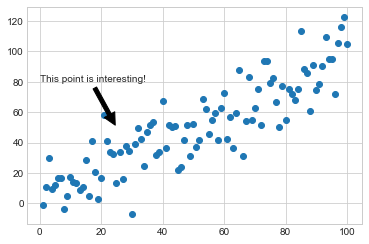

In [584]:
df1=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101) })
plt.plot( 'x', 'y', data=df1, linestyle='none', marker='o')
 
# Annotate with text + Arrow
plt.annotate(
# Label and coordinate
'This point is interesting!', xy=(25, 50), xytext=(0, 80),
 
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05)
)

In [848]:
df.head()

,Tout,AllTin,OtherAvT,ROOM1,GasUsed,cTdesign,cTadj,Measured,MeasuredSync,MeasuredAdj,MeasuredSyncAdj,Metered
Date Time,,,,,,,,,,,,
2018-11-01 00:00:00,7.983,14.316636,14.3733,13.750,0.0,10.834605,6.333636,4.461645,0.0,2.608165,0.0,0.0
2018-11-01 01:00:00,8.082,14.229545,14.2871,13.654,0.0,10.735605,6.147545,4.420877,0.0,2.531533,0.0,0.0
2018-11-01 02:00:00,8.182,14.142273,14.2007,13.558,0.0,10.635605,5.960273,4.379697,0.0,2.454415,0.0,0.0
2018-11-01 03:00:00,8.481,14.072636,14.1241,13.558,0.0,10.336605,5.591636,4.256570,0.0,2.302612,0.0,0.0
2018-11-01 04:00:00,8.581,13.994000,14.0473,13.461,0.0,10.236605,5.413000,4.215391,0.0,2.229051,0.0,0.0


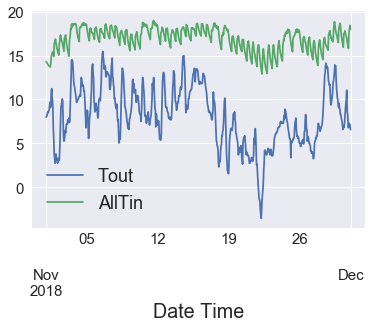

In [857]:
df[['Tout','AllTin']].plot(fontsize=15)

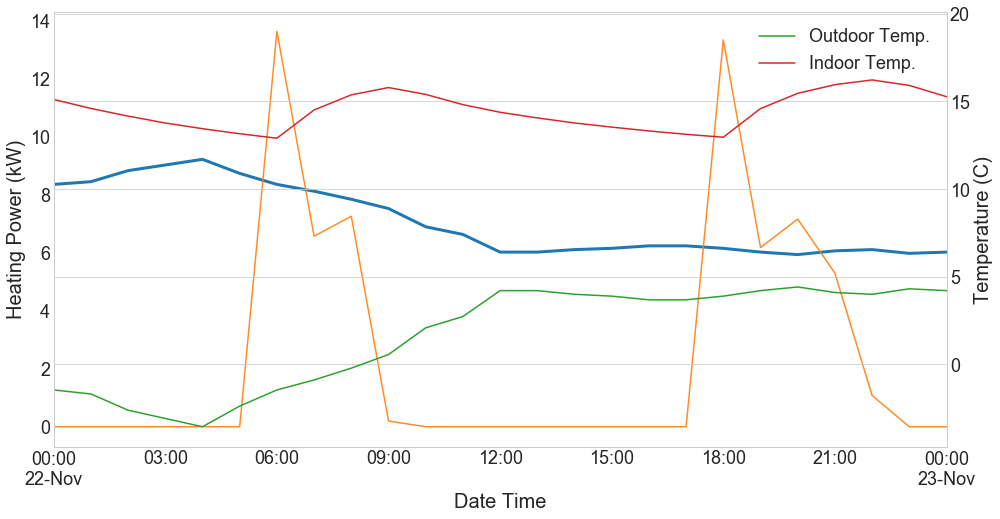

In [129]:
plt.figure(figsize=(16,8))
plt.ylabel('Heating Power (kW)', size=20)
df['Measured'].plot(lw=3, label='Measured')
df['Metered'].plot(alpha=0.9, fontsize=18, xlim=['2018-11-22','2018-11-23'])
plt.xlabel(s='November',size=20)
#plt.legend(loc=2,prop={'size': 18})
df['Tout'].plot(secondary_y=True, fontsize=18, label='Outdoor Temp.')
df['AllTin'].plot(secondary_y=True, fontsize=18, label='Indoor Temp.')
plt.ylabel('Temperature (C)', size=20)
plt.legend(loc=1,prop={'size': 18})

In [864]:
df.AllTin.idxmin()

Timestamp('2018-11-22 06:00:00')

In [9]:
print(df.Metered.idxmax()), df.Metered.max()

2018-11-22 06:00:00


(None, 13.6208375864)

In [934]:
plt.figure(figsize=(16,8))
df['AllTin'].plot(fontsize=15, label='Indoor Temp.')
plt.annotate('This is awesome!', 
             xy=(df.AllTin.idxmin(), df.AllTin.min()),  
             #xycoords='data',
             #xytext=(1, 60),
             arrowprops=dict(arrowstyle="->"))

SyntaxError: invalid token (<ipython-input-934-77ff455e2fe8>, line 4)

In [875]:
df.AllTin.idxmin(),df.AllTin.min()

(Timestamp('2018-11-22 06:00:00'), 12.89781818)

Text(1,60,'This is awesome!')

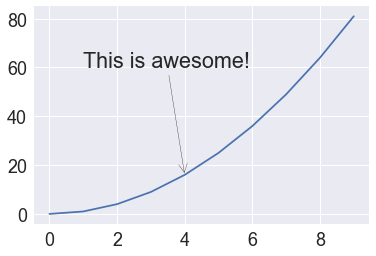

In [917]:
x = np.arange(10)
y = x**2
plt.plot(x,y)
#plt.text(4, 16, 'Square root')
plt.annotate('This is awesome!', 
             xy=(4, 16),  
             #xycoords='data',
             xytext=(1, 60),
             arrowprops=dict(arrowstyle="->"))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


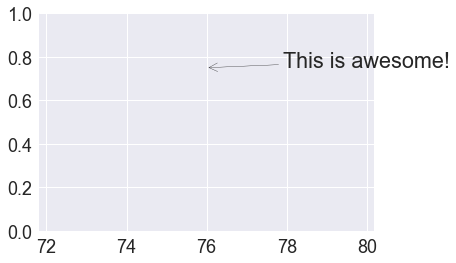

In [904]:
plt.axvspan(76, 76, facecolor='g', alpha=1)

plt.show()

In [928]:
df.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Date Time', length=720)

In [15]:
GArea, DArea, RAfrea,FArea, WArea = 0.087893401, 0.038161, 0.112762, 0.159469621, 0.159620

In [49]:
df_uncertainty = pd.DataFrame([0.087893401, 0.038161, 0.112762, 0.159469621, 0.159620, 0.847879134],['GArea', 'DArea', 'RAfrea','FArea', 'WArea', 'Volume'], ['Area Uncertainty'] )

In [42]:
df_uncertainty

,Area Uncertainty
GArea,0.087893
DArea,0.038161
RAfrea,0.112762
FArea,0.159470
WArea,0.159620


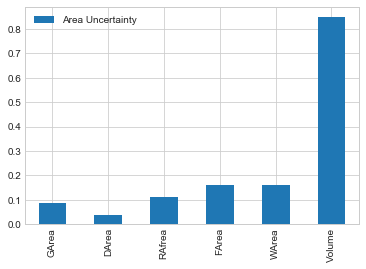

In [50]:
df_uncertainty.plot.bar()

In [51]:

uncertainty_watts = pd.DataFrame([0.239429885, 0.015786687, 0.114482531, 0.100465861, 0.175786803, 0.605273781],['Wall', 'Roof', 'Door','Floor', 'Glazing', 'Volume'], ['Uncertainty(Watt)'] )

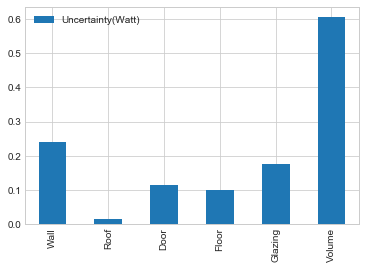

In [52]:
uncertainty_watts.plot.bar()

In [53]:
fabric_vent = pd.DataFrame([0.334180384, 0.605273781],['Fabric', 'Vent'], ['Uncertainty(Watt)'] )

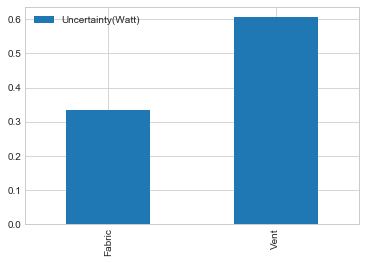

In [54]:
fabric_vent.plot.bar()

In [66]:
df_uncertainty = pd.DataFrame([0.087893401, 0.038161, 0.112762, 0.159469621, 0.159620, 0.847879134,
                               0.175786803, 0.114482531,  0.015786687,0.100465861, 0.239429885, 0.605273781*0.33, 0.334180384,
                               0.389323433, 0.565685425, 0.232994559,0.26310256],
                              ['Glazing', 'Door', 'Roof','Floor', 'Wall', 'Volume(m3)', 
                               'Glazing','Door', 'Roof', 'Floor', 'Wall','Vent(W/K)','Fabric(W/K)', 
                               'HTC(W/K)', 'Temperature(C)','Measurement', 'Windows U-Value'],['Uncertainty'] )

In [67]:
df_uncertainty['Type'] = ['Area','Area','Area','Area','Area','House',
                          'xU-Value','xU-Value','xU-Value','xU-Value','xU-Value','House', 
                          'House', 'House', 'House','Uncertainty','Uncertainty']

In [34]:
df_uncertainty

,Uncertainty,Type
Glazing,0.087893,Area
Door,0.038161,Area
Roof,0.112762,Area
Floor,0.159470,Area
Wall,0.159620,Area
Volume(m3),0.847879,House
Glazing,0.175787,xU-Value
Door,0.114483,xU-Value
Roof,0.015787,xU-Value
Floor,0.100466,xU-Value


Text(0.5,1,'Area Uncertainty')

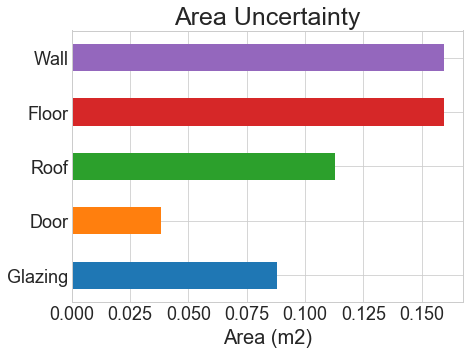

In [35]:
plt.figure(figsize=(7,5))
df_uncertainty['Uncertainty'][df_uncertainty['Type']=='Area'].plot.barh(rot=0, fontsize=18)
plt.xlabel('Area (m2)', size=20)
plt.title('Area Uncertainty', size=25)

Text(0.5,0,'Fabric Heat Loss Coefficient (W/K)')

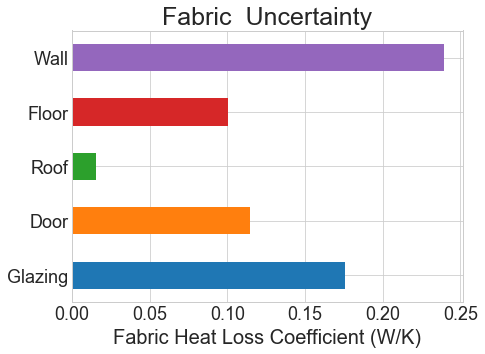

In [36]:
plt.figure(figsize=(7,5))
df_uncertainty['Uncertainty'][df_uncertainty['Type']=='xU-Value'].plot.barh(rot=0, fontsize=18)
plt.title('Fabric  Uncertainty', size=25)
plt.xlabel('Fabric Heat Loss Coefficient (W/K)', size=20)

Text(0.5,1,'Uncertainty in Measurement')

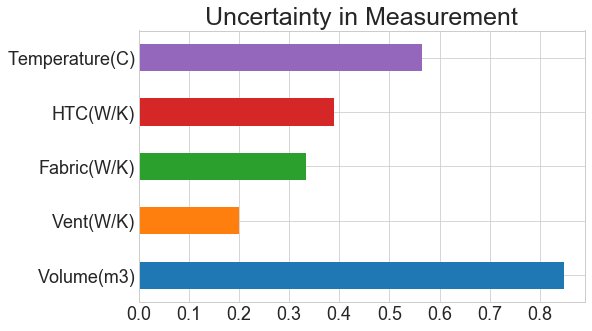

In [37]:
plt.figure(figsize=(8,5))
df_uncertainty['Uncertainty'][df_uncertainty['Type']=='House'].plot.barh(rot=0, fontsize=18)
plt.title('Uncertainty in Measurement', size=25)

Text(0.5,1,'Temperature Uncertainty (Error Bars)')

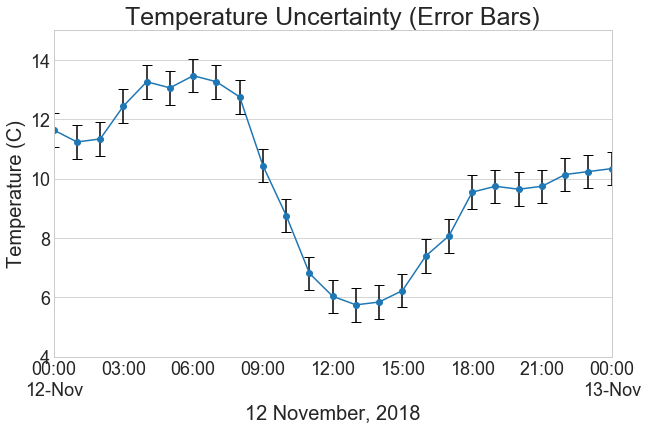

In [186]:
#df.iloc[:,[5]].plot(xlim=['2018-11-12','2018-11-13'], ylim=(-2,20),figsize=(10,6), label='Difference in temperature')
df['cTdesign'].plot(xlim=['2018-11-12','2018-11-13'], ylim=(4,15),figsize=(10,6),fontsize=18)
plt.errorbar(df.index, df['cTdesign'], yerr=0.565685425, fmt='o', ecolor='black',elinewidth=0, capthick=1, capsize=5)
plt.ylabel('Temperature (C)', size=20)
plt.xlabel('12 November, 2018',size=20)
plt.title('Temperature Uncertainty (Error Bars)', size=25)

In [8]:
dfweek.plot.bar(figsize=(12,6), yerr=0.23299*24, ecolor='black', capsize=5, rot=0)

NameError: name 'dfweek' is not defined

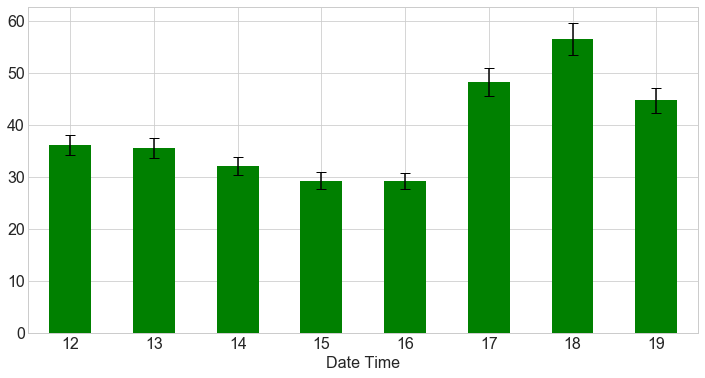

In [173]:
df['2018-11-12':'2018-11-19']['Metered'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum().plot.bar(color='g',
            figsize=(12,6), yerr=df['2018-11-12':'2018-11-19']['Metered'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum()*0.054, ecolor='black', capsize=5, rot=0)

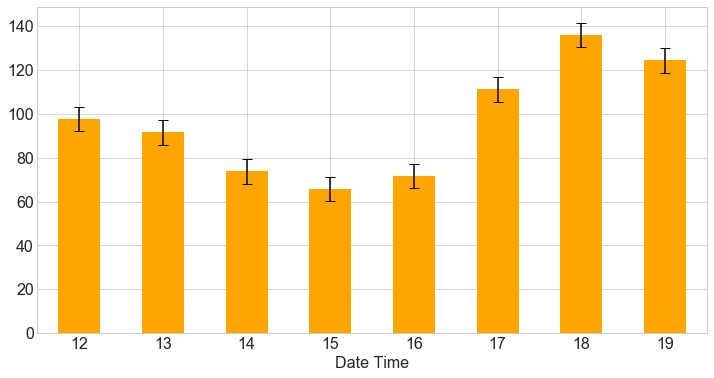

In [50]:
df['2018-11-12':'2018-11-19']['Measured'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum().plot.bar(color='orange',
            figsize=(12,6), yerr=0.23299*24, ecolor='black', capsize=5, rot=0)

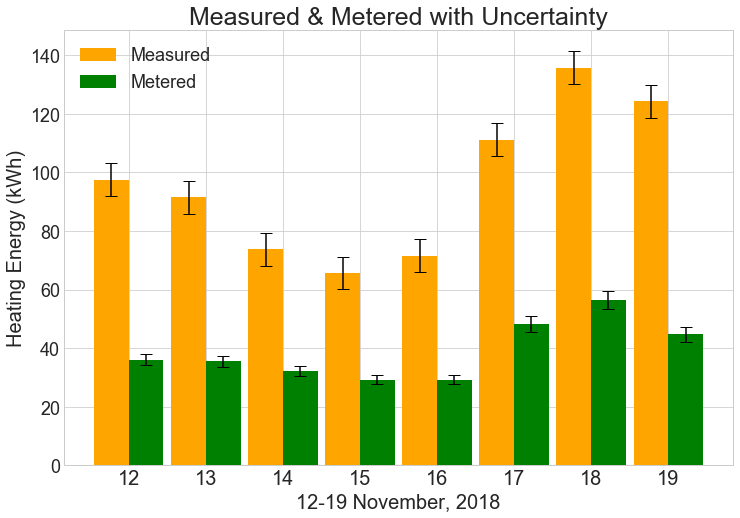

In [195]:
font = {'size' : 18}
import matplotlib
matplotlib.rc('font', **font)
glazing = 0.68
fig, ax = plt.subplots(figsize=(12,8))
#measuredc = df['Measured'].groupby(df.index.day).sum()
measuredc = df['2018-11-12':'2018-11-19']['Measured'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum()
meteredc = df['2018-11-12':'2018-11-19']['Metered'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum()
index = np.arange(12,20)
width = 0.45
config = {'ecolor': '0.3'}

#ax.bar(index, measured, width,label='Measured', color='orange', alpha=0)
ax.bar(index, measuredc, width, label='Measured', color='orange', yerr=0.23299*24, ecolor='black', capsize=6)
ax.bar(index+width, meteredc, width, label='Metered', color='g',
       yerr=df['2018-11-12':'2018-11-19']['Metered'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum()*0.054, capsize=6)

ax.set_xlabel('12-19 November, 2018', size=20)
ax.set_ylabel('Heating Energy (kWh)', size=20)
ax.set_title('Measured & Metered with Uncertainty', size=25)
ax.set_xticks(index + width / 2)
ax.set_xticklabels(index, size=20)
ax.legend(loc=2,prop={'size': 18})

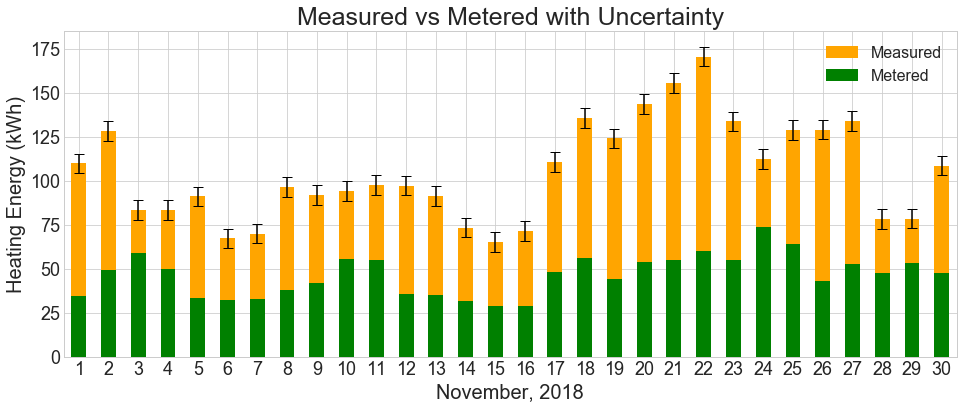

In [76]:
df['Measured'].groupby(df.index.day).sum().plot.bar(color='orange', figsize=(16,6), yerr=0.23299*24, ecolor='black', 
                                                    capsize=5, rot=0, label='Measured', fontsize=18)
df['Metered'].groupby(df.index.day).sum().plot.bar(color='g', label='Metered', rot=0)
plt.xlabel('November, 2018', size=20)
plt.ylabel('Heating Energy (kWh)', size=20)
plt.title('Measured vs Metered with Uncertainty', size=25)
plt.legend()

Text(0,0.5,'Energy (kWh)')

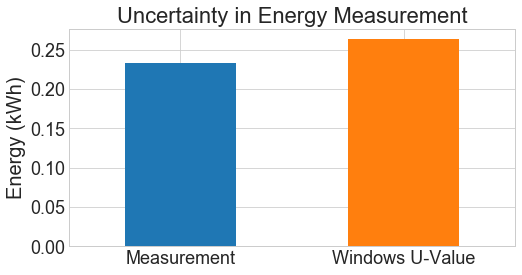

In [69]:
plt.figure(figsize=(8,4))
df_uncertainty['Uncertainty'][df_uncertainty['Type']=='Uncertainty'].plot.bar(rot=0, fontsize=18)
plt.title('Uncertainty in Energy Measurement', size=22)
plt.ylabel('Energy (kWh)', size=20)

Text(0.5,0,'12-19 November, 2018')

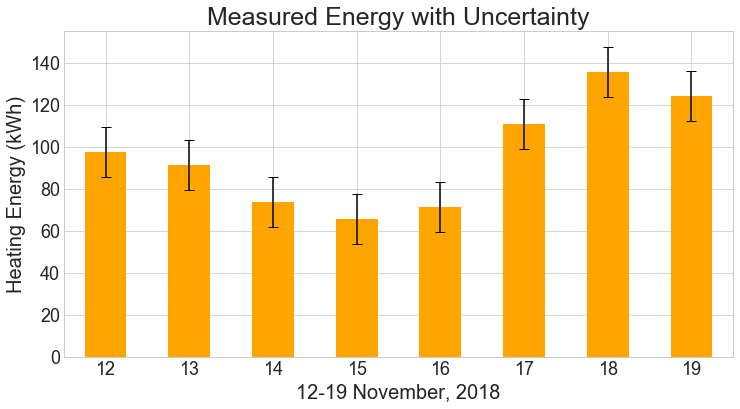

In [72]:
df['2018-11-12':'2018-11-19']['Measured'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum().plot.bar(color='orange',
            figsize=(12,6), yerr=0.496*24, ecolor='black', capsize=5, rot=0, fontsize=18)
plt.title('Measured Energy with Uncertainty', size=25)
plt.ylabel('Heating Energy (kWh)', size=20)
plt.xlabel('12-19 November, 2018', size=20)

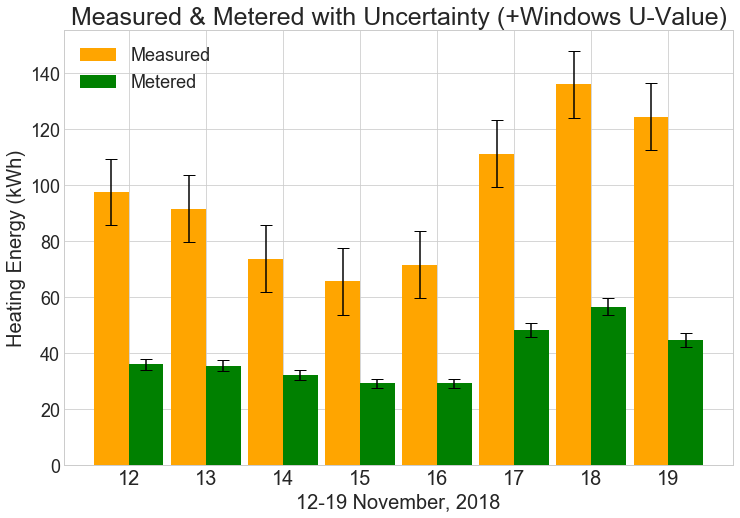

In [246]:
font = {'size' : 18}
import matplotlib
matplotlib.rc('font', **font)
glazing = 0.68
fig, ax = plt.subplots(figsize=(12,8))
#measuredc = df['Measured'].groupby(df.index.day).sum()
measuredcw = df['2018-11-12':'2018-11-19']['Measured'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum()
meteredcc = df['2018-11-12':'2018-11-19']['Metered'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum()
index = np.arange(12,20)
width = 0.45
config = {'ecolor': '0.3'}

#ax.bar(index, measured, width,label='Measured', color='orange', alpha=0)
ax.bar(index, measuredc, width, label='Measured', color='orange', yerr=0.496*24, ecolor='black', capsize=6)
ax.bar(index+width, meteredc, width, label='Metered', color='g',
       yerr=df['2018-11-12':'2018-11-19']['Metered'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum()*0.054, capsize=6)

ax.set_xlabel('12-19 November, 2018', size=20)
ax.set_ylabel('Heating Energy (kWh)', size=20)
ax.set_title('Measured & Metered with Uncertainty (+Windows U-Value)', size=25)
ax.set_xticks(index + width / 2)
ax.set_xticklabels(index, size=20)
ax.legend(loc=2,prop={'size': 18})

In [245]:
df['2018-11-15']['Measured'].sum(), df['2018-11-15']['MeasuredAdj'].sum()

(65.69358108517551, 55.428200148738114)

Text(0.5,0,'12-19 November, 2018')

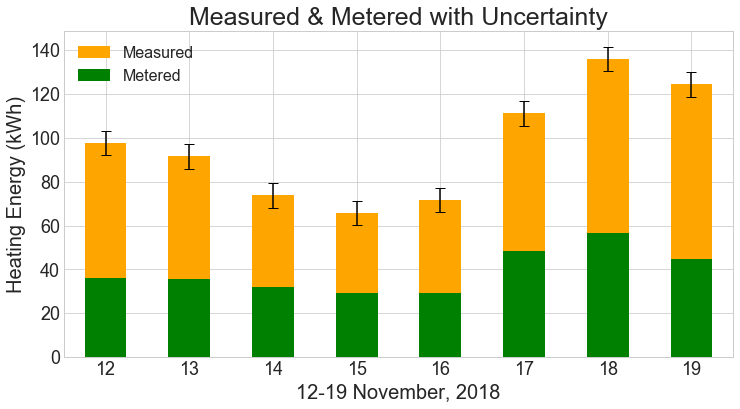

In [144]:
plt.figure()
df['2018-11-12':'2018-11-19']['Measured'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum().plot.bar(color='orange',
            figsize=(12,6), yerr=0.23299*24, ecolor='black', capsize=5, rot=0, fontsize=18)
df['Metered']['2018-11-12':'2018-11-19'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum().plot.bar(color='g', label='Metered', rot=0)
plt.legend()
plt.title('Measured & Metered with Uncertainty', size=25)
plt.ylabel('Heating Energy (kWh)', size=20)
plt.xlabel('12-19 November, 2018', size=20)

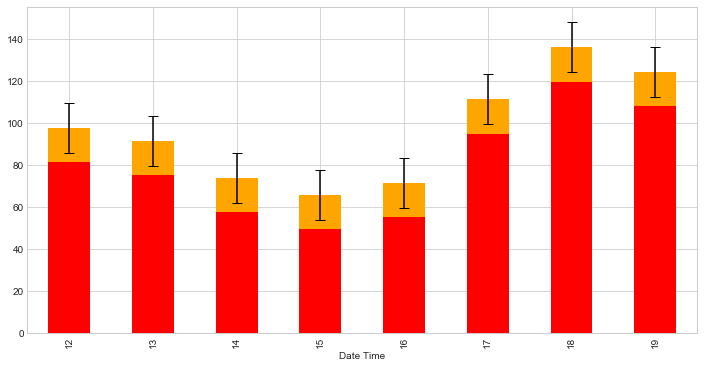

In [306]:
glazing = 0.68
df['2018-11-12':'2018-11-19']['Measured'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum().plot.bar(color='orange',
            figsize=(12,6), yerr=0.496*24, ecolor='black', capsize=5, rot=0)
(df['2018-11-12':'2018-11-19']['Measured'] - glazing).groupby(df['2018-11-12':'2018-11-19'].index.day).sum().plot.bar(color='red')

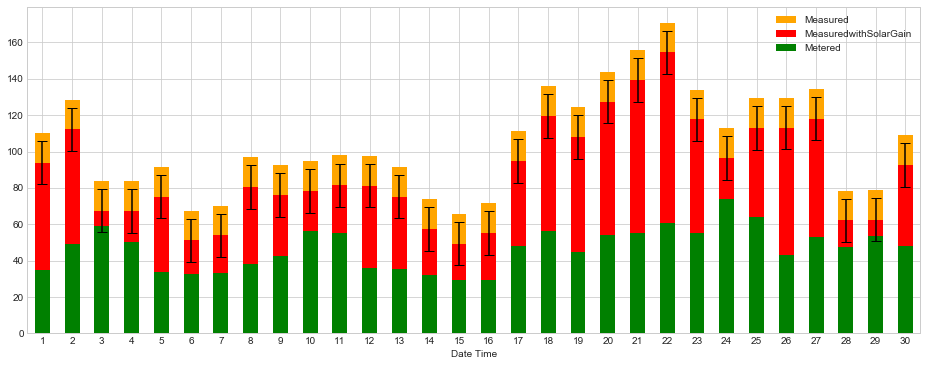

In [376]:
glazing = 0.68
plt.figure()
df['Measured'].groupby(df.index.day).sum().plot.bar(color='orange',
            figsize=(16,6), label='Measured')
(df['Measured'] - glazing).groupby(df.index.day).sum().plot.bar(color='r', label='MeasuredwithSolarGain', rot=0,
                                                                yerr=0.496*24, ecolor='black', capsize=5)

df['Metered'].groupby(df.index.day).sum().plot.bar(color='g', label='Metered', rot=0)

plt.legend()

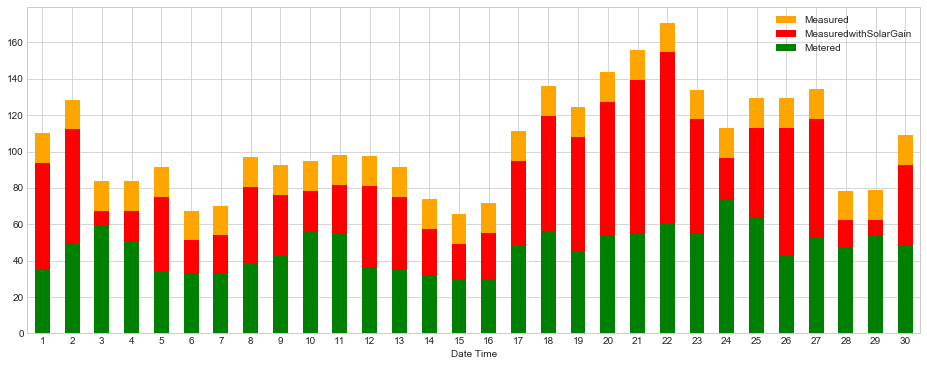

In [308]:
glazing = 0.68
plt.figure()
df['Measured'].groupby(df.index.day).sum().plot.bar(color='orange',
            figsize=(16,6), label='Measured')
(df['Measured'] - glazing).groupby(df.index.day).sum().plot.bar(color='r', label='MeasuredwithSolarGain', rot=0)

df['Metered'].groupby(df.index.day).sum().plot.bar(color='g', label='Metered', rot=0)

plt.legend()

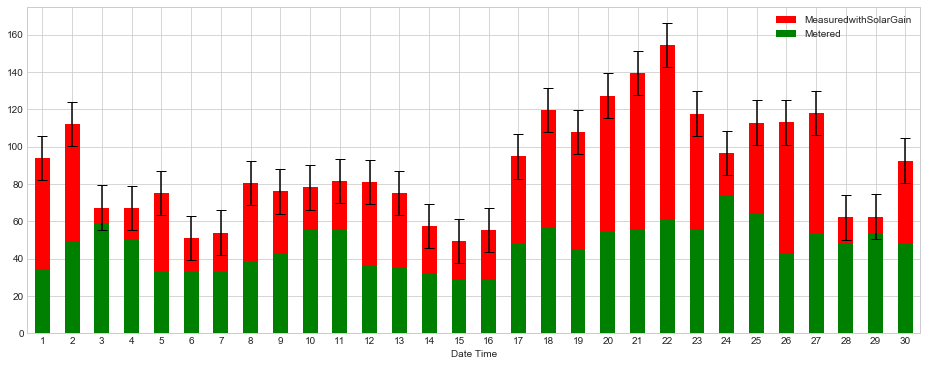

In [310]:
glazing = 0.68
plt.figure(figsize=(16,6))
(df['Measured'] - glazing).groupby(df.index.day).sum().plot.bar(color='r', label='MeasuredwithSolarGain', rot=0,
                                                                yerr=0.496*24, ecolor='black', capsize=5)
df['Metered'].groupby(df.index.day).sum().plot.bar(color='g', label='Metered', rot=0)

plt.legend()

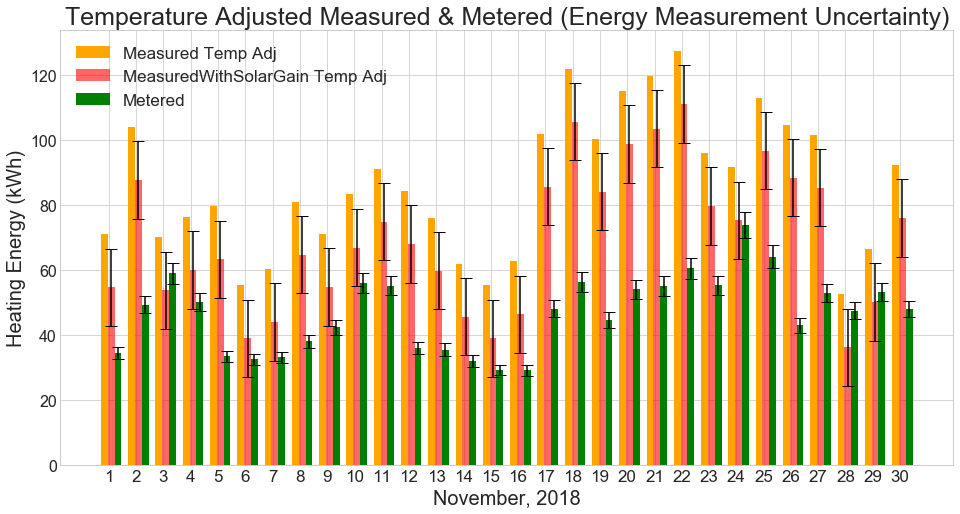

In [253]:
font = {'size' : 16}
import matplotlib
matplotlib.rc('font', **font)
glazing = 0.68
fig, ax = plt.subplots(figsize=(16,8))
measured = df['MeasuredAdj'].groupby(df.index.day).sum()
mg = (df['MeasuredAdj'] - glazing).groupby(df.index.day).sum()
metered = df['Metered'].groupby(df.index.day).sum()
index = np.arange(1,31)
width = 0.25
config = {'ecolor': '0.3'}

ax.bar(index, measured, width,label='Measured Temp Adj', color='orange')
ax.bar(index+width, mg, width, label='MeasuredWithSolarGain Temp Adj', color='r',alpha=0.6,yerr=0.496*24, ecolor='black', capsize=6)
ax.bar(index+width*2, metered, width, label='Metered', color='g', yerr=df.Metered.groupby(df.index.day).sum()*0.054, capsize=6)

ax.set_xlabel('November, 2018', size=20)
ax.set_ylabel('Heating Energy (kWh)', size=20)
ax.set_title('Temperature Adjusted Measured & Metered (Energy Measurement Uncertainty)', size=25)
ax.set_xticks(index + width*2 / 3)
ax.set_xticklabels(index, size=17)
ax.legend(loc=2,prop={'size': 17})


In [230]:
(0.496*24/(df['Measured']- glazing).groupby(df.index.day).sum()).idxmin()

0.06966350024581

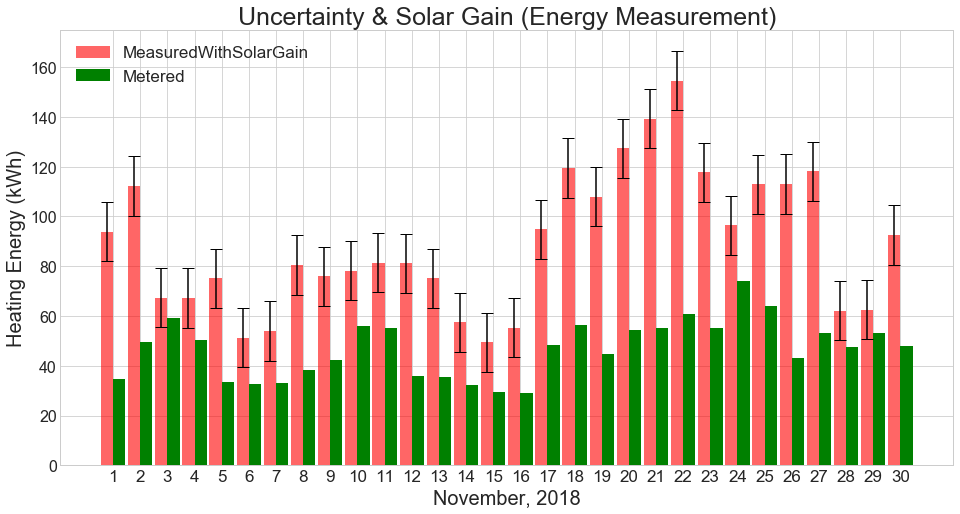

In [101]:
font = {'size' : 16}
import matplotlib
matplotlib.rc('font', **font)
glazing = 0.68
fig, ax = plt.subplots(figsize=(16,8))
#measured = df['Measured'].groupby(df.index.day).sum()
mg = (df['Measured'] - glazing).groupby(df.index.day).sum()
metered = df['Metered'].groupby(df.index.day).sum()
index = np.arange(1,31)
width = 0.45
config = {'ecolor': '0.3'}

#ax.bar(index, measured, width,label='Measured', color='orange', alpha=0)
ax.bar(index, mg, width, label='MeasuredWithSolarGain', color='r', alpha=0.6,yerr=0.496*24, ecolor='black', capsize=6)
ax.bar(index+width, metered, width, label='Metered', color='g')

ax.set_xlabel('November, 2018', size=20)
ax.set_ylabel('Heating Energy (kWh)', size=20)
ax.set_title('Uncertainty & Solar Gain (Energy Measurement)', size=25)
ax.set_xticks(index + width / 2)
ax.set_xticklabels(index, size=17)
ax.legend(loc=2,prop={'size': 17})

In [154]:
df.cTdesign.max(), df.cTdesign.idxmax()

(22.370604615012834, Timestamp('2018-11-22 04:00:00'))

In [171]:
gasUncertainty = pd.DataFrame()

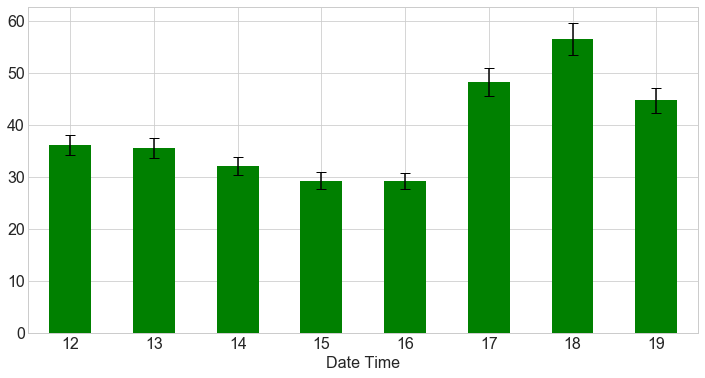

In [174]:
df['2018-11-12':'2018-11-19']['Metered'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum().plot.bar(color='g',
            figsize=(12,6), yerr=df['2018-11-12':'2018-11-19']['Metered'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum()*0.054, ecolor='black', capsize=5, rot=0)

In [ ]:
font = {'size' : 16}
import matplotlib
matplotlib.rc('font', **font)
glazing = 0.68
fig, ax = plt.subplots(figsize=(16,8))
#measuredc = df['Measured'].groupby(df.index.day).sum()
measuredc = df['2018-11-12':'2018-11-19']['Measured'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum()
meteredc = df['2018-11-12':'2018-11-19']['Metered'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum()
index = np.arange(12,20)
width = 0.45
config = {'ecolor': '0.3'}

#ax.bar(index, measured, width,label='Measured', color='orange', alpha=0)
ax.bar(index, measuredc, width, label='MeasuredWithSolarGain', color='orange', yerr=0.23299*24, ecolor='black', capsize=6)
ax.bar(index+width, meteredc, width, label='Metered', color='g',
       yerr=df['2018-11-12':'2018-11-19']['Metered'].groupby(df['2018-11-12':'2018-11-19'].index.day).sum()*0.054, capsize=6)

ax.set_xlabel('November, 2018', size=20)
ax.set_ylabel('Heating Energy (kWh)', size=20)
ax.set_title('Uncertainty & Solar Gain (Energy Measurement)', size=25)
ax.set_xticks(index + width / 2)
ax.set_xticklabels(index, size=17)
ax.legend(loc=2,prop={'size': 17})

In [205]:
df.head()

,Tout,AllTin,OtherAvT,ROOM1,GasUsed,cTdesign,cTadj,Measured,MeasuredSync,MeasuredAdj,MeasuredSyncAdj,Metered
Date Time,,,,,,,,,,,,
2018-11-01 00:00:00,7.983,14.316636,14.3733,13.750,0.0,10.834605,6.333636,4.461645,0.0,2.608165,0.0,0.0
2018-11-01 01:00:00,8.082,14.229545,14.2871,13.654,0.0,10.735605,6.147545,4.420877,0.0,2.531533,0.0,0.0
2018-11-01 02:00:00,8.182,14.142273,14.2007,13.558,0.0,10.635605,5.960273,4.379697,0.0,2.454415,0.0,0.0
2018-11-01 03:00:00,8.481,14.072636,14.1241,13.558,0.0,10.336605,5.591636,4.256570,0.0,2.302612,0.0,0.0
2018-11-01 04:00:00,8.581,13.994000,14.0473,13.461,0.0,10.236605,5.413000,4.215391,0.0,2.229051,0.0,0.0


(<seaborn.axisgrid.FacetGrid at 0x213228462b0>,
 <seaborn.axisgrid.FacetGrid at 0x21322856e48>)

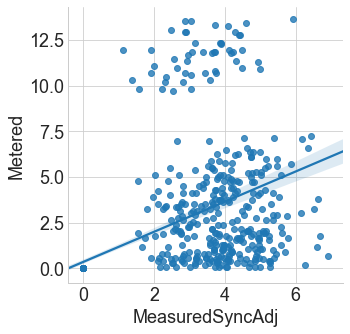

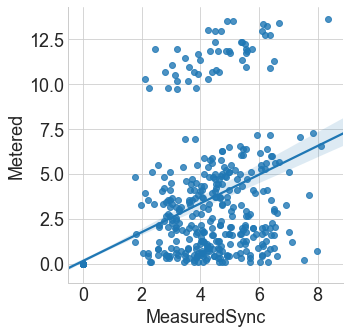

In [209]:
sns.lmplot(x='MeasuredSyncAdj', y='Metered', data=df), sns.lmplot(x='MeasuredSync', y='Metered', data=df)

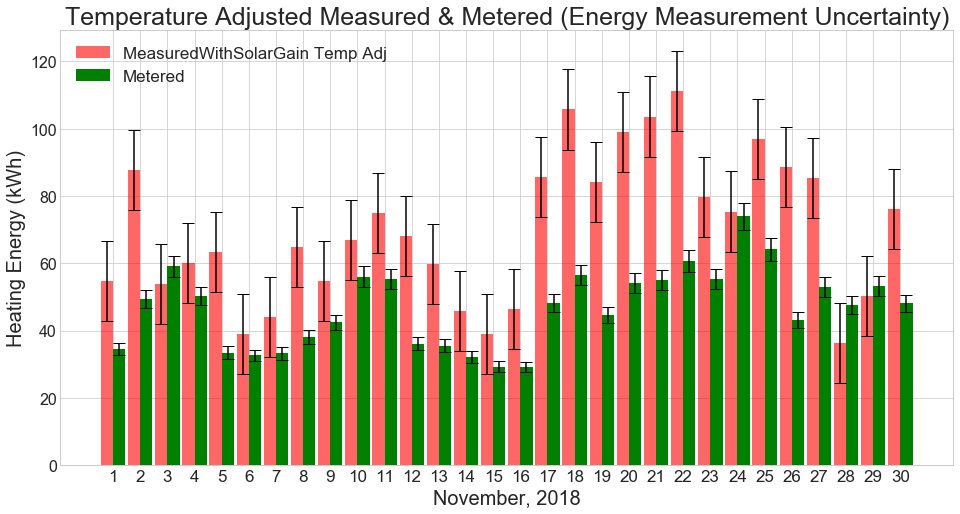

In [256]:
font = {'size' : 16}
import matplotlib
matplotlib.rc('font', **font)
glazing = 0.68
fig, ax = plt.subplots(figsize=(16,8))
#measured = df['MeasuredAdj'].groupby(df.index.day).sum()
mg = (df['MeasuredAdj'] - glazing).groupby(df.index.day).sum()
metered = df['Metered'].groupby(df.index.day).sum()
index = np.arange(1,31)
width = 0.45
config = {'ecolor': '0.3'}

#ax.bar(index, measured, width,label='Measured Temp Adj', color='orange')
ax.bar(index, mg, width, label='MeasuredWithSolarGain Temp Adj', color='r',alpha=0.6,yerr=0.496*24, ecolor='black', capsize=6)
ax.bar(index+width, metered, width, label='Metered', color='g', yerr=df.Metered.groupby(df.index.day).sum()*0.054, capsize=6)

ax.set_xlabel('November, 2018', size=20)
ax.set_ylabel('Heating Energy (kWh)', size=20)
ax.set_title('Temperature Adjusted Measured & Metered (Energy Measurement Uncertainty)', size=25)
ax.set_xticks(index + width/ 2)
ax.set_xticklabels(index, size=17)
ax.legend(loc=2,prop={'size': 17})

In [260]:
df[['Measured','MeasuredAdj','Metered']].sum()

Measured       3164.301996
MeasuredAdj    2591.789513
Metered        1405.004096
dtype: float64

In [258]:
df[['Measured','MeasuredAdj','Metered']]['2018-11-12':'2018-11-19'].sum()

Measured       771.308377
MeasuredAdj    665.470347
Metered        311.711398
dtype: float64

In [259]:
df[['Measured','MeasuredAdj','Metered']]['2018-11-15'].sum()

Measured       65.693581
MeasuredAdj    55.428200
Metered        29.299500
dtype: float64

In [281]:
(df['MeasuredAdj']['2018-11-15'] - glazing).groupby(df['2018-11-15'].index.day).sum()

Date Time
15    39.1082
Name: MeasuredAdj, dtype: float64

In [279]:
(df['MeasuredAdj'] - glazing).sum()

2102.1895125560077

In [280]:
(df['MeasuredAdj']['2018-11-12':'2018-11-19'] - glazing).groupby(df['2018-11-12':'2018-11-19'].index.day).sum().sum()

534.9103466164745

In [282]:
0.496*24, 0.496*24*8, 0.496*720

(11.904, 95.232, 357.12)